# Cities with the Best Work-Life Balance 2022

Three aspects of work-life balance

- **Work Intensity**

- **Society and Institutions**

- **City Liveability**

In [1]:
library(tidyverse)
library(paletteer)
library(showtext)
library(patchwork)
library(tidytext)
library(reshape2)
library(ggrepel)
library(ggtext)
library(lubridate)
library(janitor)
library(ggthemes)
library(scales)
library(tidyr)
library(lattice)


library(repr)
options(repr.plot.width = 20, repr.plot.height =13)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: sysfonts

Loading required package: showtextdb


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [2]:
df <- read.csv("../input/cities-with-the-best-worklife-balance-2022/Cities with the Best Work-Life Balance 2022.csv")
head(df)

,X2022,X2021,City,Country,Remote.Jobs,Overworked.Population,Minimum.Vacations.Offered..Days.,Vacations.Taken..Days.,Unemployment,Multiple.Jobholders,⋯,Healthcare,Access.to.Mental.Healthcare,Inclusivity...Tolerance,Affordability,Happiness..Culture...Leisure,City.Safety,Outdoor.Spaces,Air.Quality,Wellness.and.Fitness,TOTAL.SCORE
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,2,Oslo,Norway,41.72%,11.20%,25,25,94.7,9.10%,⋯,100.0,85.0,93.2,59.4,88.8,86.5,95.6,97.5,65.7,100.00
2,2,-,Bern,Switzerland,44.86%,11.40%,20,25,99.8,7.60%,⋯,99.6,78.6,94.6,69.9,100.0,91.8,87.1,100.0,69.1,99.46
3,3,1,Helsinki,Finland,38.92%,12.70%,25,30,89.3,6.30%,⋯,96.7,73.0,93.9,65.0,96.3,94.9,86.0,97.0,68.3,99.24
4,4,3,Zurich,Switzerland,44.86%,11.90%,20,25,99.2,7.60%,⋯,99.2,78.6,87.5,71.6,91.5,92.8,84.0,96.2,68.7,96.33
5,5,5,Copenhagen,Denmark,41.42%,10.50%,25,28,94.8,7.60%,⋯,94.8,77.6,95.2,65.3,92.5,95.7,75.5,95.1,66.3,96.21
6,6,-,Geneva,Switzerland,44.86%,11.90%,20,25,95.2,7.60%,⋯,99.1,78.6,94.4,70.7,100.0,85.4,92.0,96.8,67.7,95.82


In [3]:
df <- clean_names(df)
head(df)

,x2022,x2021,city,country,remote_jobs,overworked_population,minimum_vacations_offered_days,vacations_taken_days,unemployment,multiple_jobholders,⋯,healthcare,access_to_mental_healthcare,inclusivity_tolerance,affordability,happiness_culture_leisure,city_safety,outdoor_spaces,air_quality,wellness_and_fitness,total_score
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,2,Oslo,Norway,41.72%,11.20%,25,25,94.7,9.10%,⋯,100.0,85.0,93.2,59.4,88.8,86.5,95.6,97.5,65.7,100.00
2,2,-,Bern,Switzerland,44.86%,11.40%,20,25,99.8,7.60%,⋯,99.6,78.6,94.6,69.9,100.0,91.8,87.1,100.0,69.1,99.46
3,3,1,Helsinki,Finland,38.92%,12.70%,25,30,89.3,6.30%,⋯,96.7,73.0,93.9,65.0,96.3,94.9,86.0,97.0,68.3,99.24
4,4,3,Zurich,Switzerland,44.86%,11.90%,20,25,99.2,7.60%,⋯,99.2,78.6,87.5,71.6,91.5,92.8,84.0,96.2,68.7,96.33
5,5,5,Copenhagen,Denmark,41.42%,10.50%,25,28,94.8,7.60%,⋯,94.8,77.6,95.2,65.3,92.5,95.7,75.5,95.1,66.3,96.21
6,6,-,Geneva,Switzerland,44.86%,11.90%,20,25,95.2,7.60%,⋯,99.1,78.6,94.4,70.7,100.0,85.4,92.0,96.8,67.7,95.82


In [4]:
df[df == "USA"] <- "United States"
df[df == 'UK'] <- "United Kingdom"
df[df == 'UAE'] <- "United Arab Emirates"

In [5]:
c_codes <- read.csv("../input/country-mapping-iso-continent-region/continents2.csv")
head(c_codes)

,name,alpha.2,alpha.3,country.code,iso_3166.2,region,sub.region,intermediate.region,region.code,sub.region.code,intermediate.region.code
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,,142,34,NA
2,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,,150,154,NA
3,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,,150,39,NA
4,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,,2,15,NA
5,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,,9,61,NA
6,Andorra,AD,AND,20,ISO 3166-2:AD,Europe,Southern Europe,,150,39,NA


In [6]:
c_codes <- rename(c_codes, country = name)
head(c_codes)

,country,alpha.2,alpha.3,country.code,iso_3166.2,region,sub.region,intermediate.region,region.code,sub.region.code,intermediate.region.code
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,,142,34,NA
2,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,,150,154,NA
3,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,,150,39,NA
4,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,,2,15,NA
5,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,,9,61,NA
6,Andorra,AD,AND,20,ISO 3166-2:AD,Europe,Southern Europe,,150,39,NA


In [7]:
df1 <- left_join(df, c_codes, by = 'country')
head(df1)

,x2022,x2021,city,country,remote_jobs,overworked_population,minimum_vacations_offered_days,vacations_taken_days,unemployment,multiple_jobholders,⋯,alpha.2,alpha.3,country.code,iso_3166.2,region,sub.region,intermediate.region,region.code,sub.region.code,intermediate.region.code
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>,⋯,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,1,2,Oslo,Norway,41.72%,11.20%,25,25,94.7,9.10%,⋯,NO,NOR,578,ISO 3166-2:NO,Europe,Northern Europe,,150,154,NA
2,2,-,Bern,Switzerland,44.86%,11.40%,20,25,99.8,7.60%,⋯,CH,CHE,756,ISO 3166-2:CH,Europe,Western Europe,,150,155,NA
3,3,1,Helsinki,Finland,38.92%,12.70%,25,30,89.3,6.30%,⋯,FI,FIN,246,ISO 3166-2:FI,Europe,Northern Europe,,150,154,NA
4,4,3,Zurich,Switzerland,44.86%,11.90%,20,25,99.2,7.60%,⋯,CH,CHE,756,ISO 3166-2:CH,Europe,Western Europe,,150,155,NA
5,5,5,Copenhagen,Denmark,41.42%,10.50%,25,28,94.8,7.60%,⋯,DK,DNK,208,ISO 3166-2:DK,Europe,Northern Europe,,150,154,NA
6,6,-,Geneva,Switzerland,44.86%,11.90%,20,25,95.2,7.60%,⋯,CH,CHE,756,ISO 3166-2:CH,Europe,Western Europe,,150,155,NA


In [8]:
glimpse(df)

Rows: 100
Columns: 24
$ x2022                          <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, …
$ x2021                          <chr> "2", "-", "1", "3", "5", "-", "6", "10"…
$ city                           <chr> "Oslo", "Bern", "Helsinki", "Zurich", "…
$ country                        <chr> "Norway", "Switzerland", "Finland", "Sw…
$ remote_jobs                    <chr> "41.72%", "44.86%", "38.92%", "44.86%",…
$ overworked_population          <chr> "11.20%", "11.40%", "12.70%", "11.90%",…
$ minimum_vacations_offered_days <int> 25, 20, 25, 20, 25, 20, 10, 20, 20, 20,…
$ vacations_taken_days           <chr> "25", "25", "30", "25", "28", "25", "16…
$ unemployment                   <dbl> 94.7, 99.8, 89.3, 99.2, 94.8, 95.2, 95.…
$ multiple_jobholders            <chr> "9.10%", "7.60%", "6.30%", "7.60%", "7.…
$ inflation                      <chr> "6.47%", "1.80%", "4.79%", "1.80%", "5.…
$ paid_parental_leave_days       <chr> "707", "98", "1,190", "98", "364", "98"…
$ covid_impact    

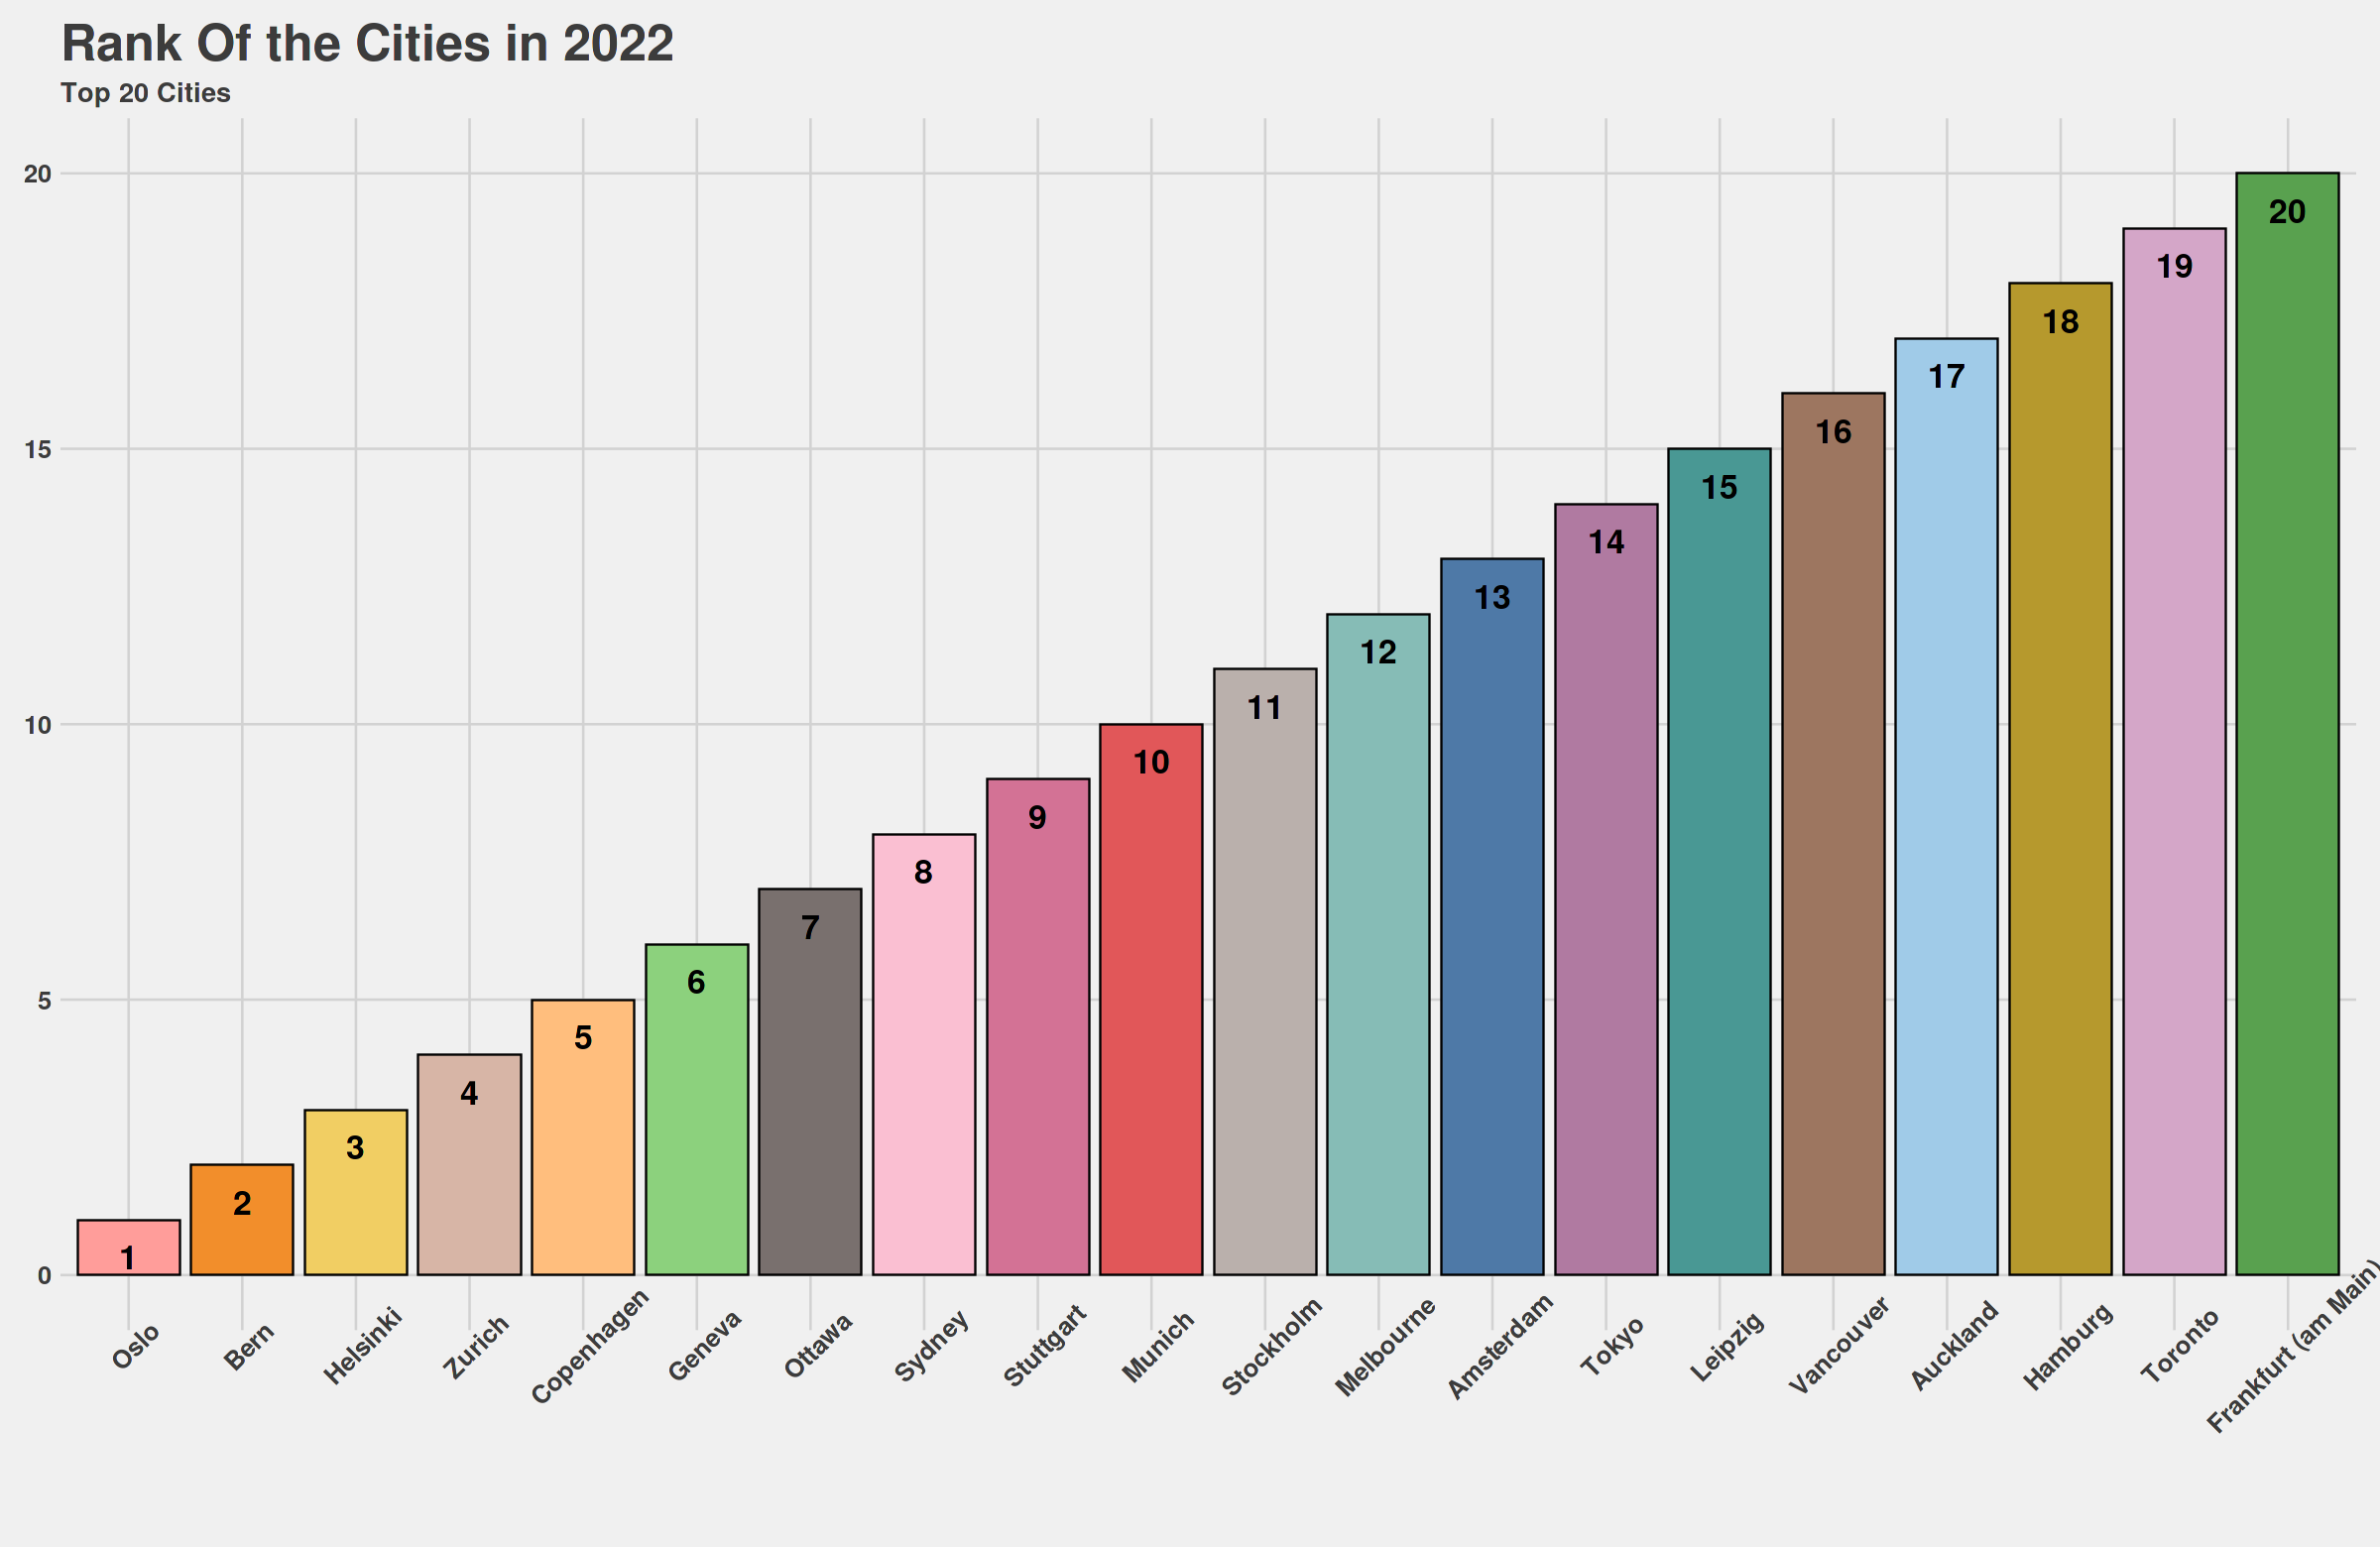

In [9]:
p1 <- df1 %>%
arrange(x2022)%>%
head(20)%>%
ggplot(aes(fct_reorder(city, x2022),x2022, fill = city))+
geom_col(color = 'black')+
geom_text(aes(label=x2022), size = 7, hjust = 0.5, vjust = 2, fontface = 'bold')+
theme_fivethirtyeight()+
scale_fill_paletteer_d("ggthemes::Tableau_20")+
labs(title = "Rank Of the Cities in 2022",
    subtitle = "Top 20 Cities")+
theme(axis.text.x = element_text(size = 15, face = 'bold', angle = 45))+
theme(axis.text.y = element_text(size = 15, face = 'bold'))+
theme(plot.title =  element_text(size = 30, face = 'bold'))+
theme(plot.subtitle = element_text(size = 25, face = 'bold'))+
theme(plot.subtitle =  element_text(size = 16, face = 'bold'))+
theme(legend.position = 'none')
p1

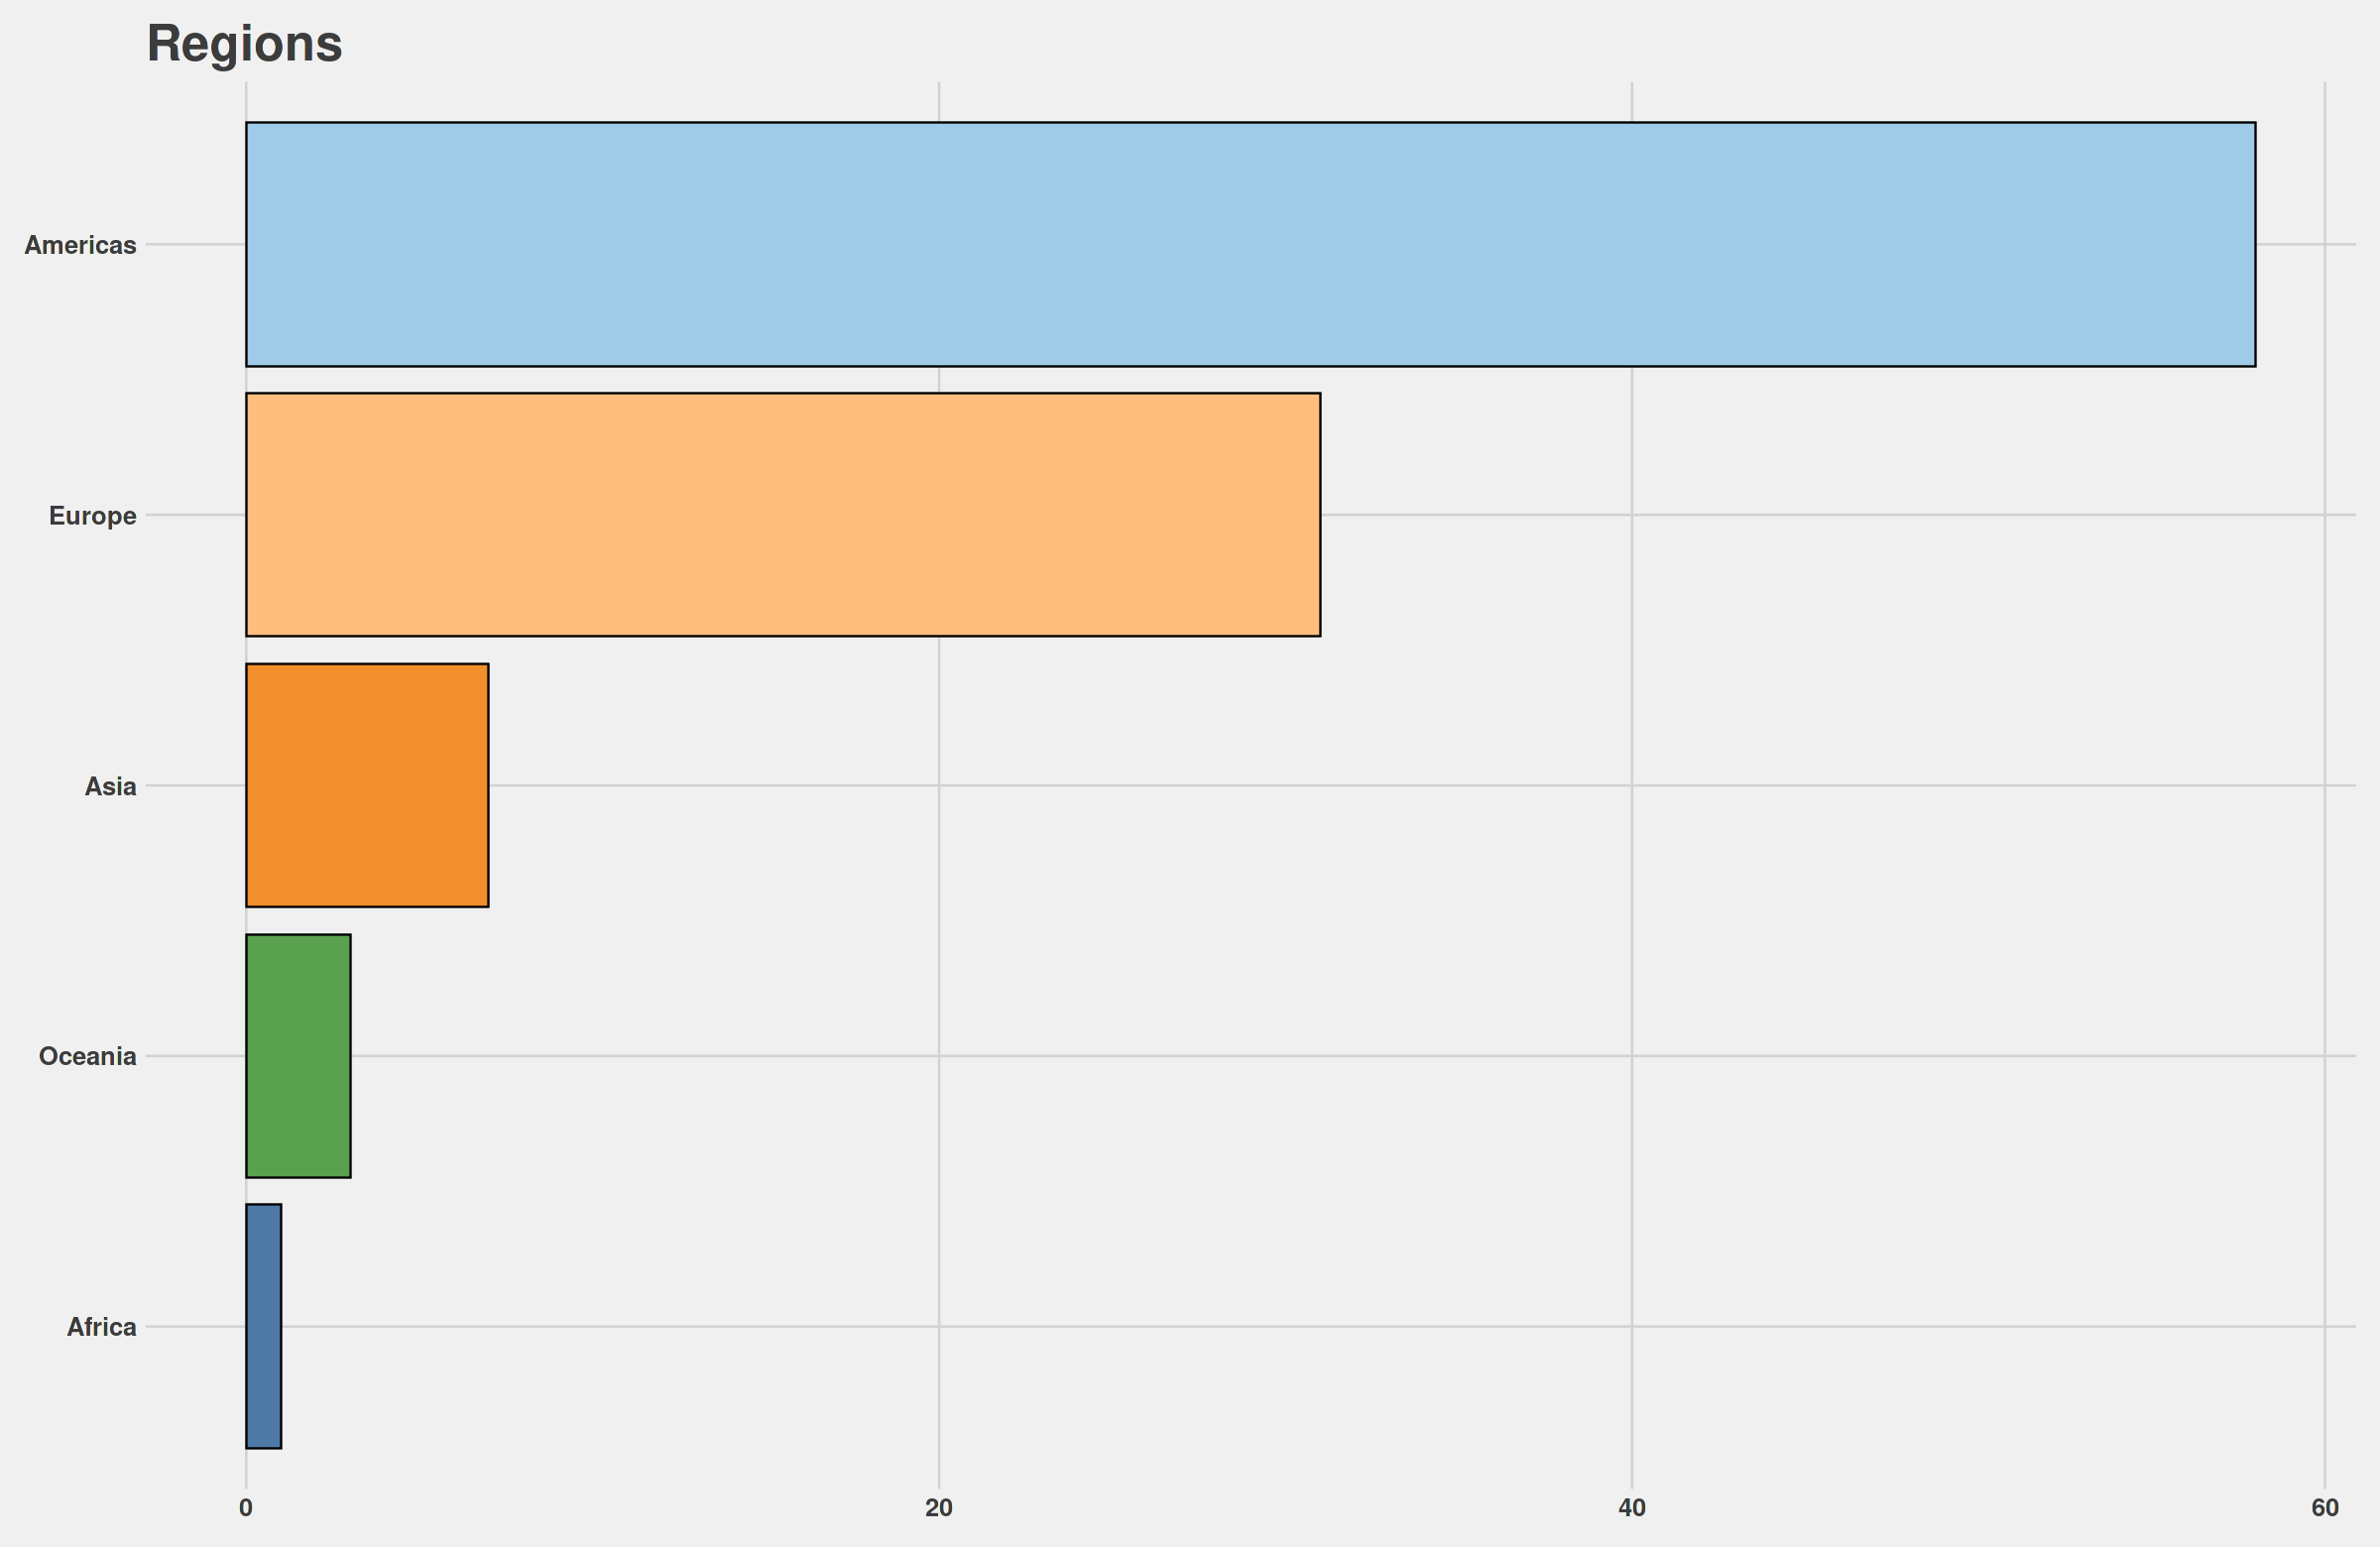

In [10]:
df1 %>%
count(region, sort = TRUE)%>%
ggplot(aes(reorder(region, n),n, fill = region))+
geom_col(color = 'black')+
coord_flip()+
theme_fivethirtyeight()+
scale_fill_paletteer_d("ggthemes::Tableau_20")+
labs(title = "Regions")+
theme(axis.text.x = element_text(size = 15, face = 'bold'))+
theme(axis.text.y = element_text(size = 15, face = 'bold'))+
theme(plot.title =  element_text(size = 30, face = 'bold'))+
theme(legend.position = 'none')

# Work Intensity

`remote_jobs` : The percentage of jobs that can be performed remotely in each city, and the feasibility of working at home for all occupations. A higher percentage reflects a city with a higher number of remote job opportunities and a better infrastructure to support working from home.

`overworked_population` : The percentage of full-time employees working more than 48 hours per working week in each city. A higher percentage reflects a city with a greater amount of its population working overtime.

`minimum_vacations_offer_days` : The minimum number of compensated vacation days an employee is legally entitled to after at least one year of service. Data was taken at a national level for a full-time, five-day workweek (excluding public holidays). A higher score reflects a city with a higher amount of vacation days offered to employees.

`vacations_taken_days` : The average number of paid vacation days taken by full-time employees in a single year.

`unemployment` : A score that reflects the unemployment rate for the metropolitan area or region in the first quarter of 2021. A higher score reflects a city with a lower level of unemployment.

`multiple_jobholders` : The percentage of employed people in each city holding more than one job at a time.

`inflation` : The rate of price inflation for a range of consumer goods and services including food, beverages, clothing, housing, water, electricity, gas, furnishing, health, transport, communication, recreation, restaurants and hotels. The study compared the index values from the start of the pandemic (using an average of the months January and February 2020) with the index values from the most recent available data to show the percentage change. The study used state-level data for the US and country-level data for the rest of the world.

`paid_parental_leave_days` : The number of paid family leave days afforded to employees by law in each city.

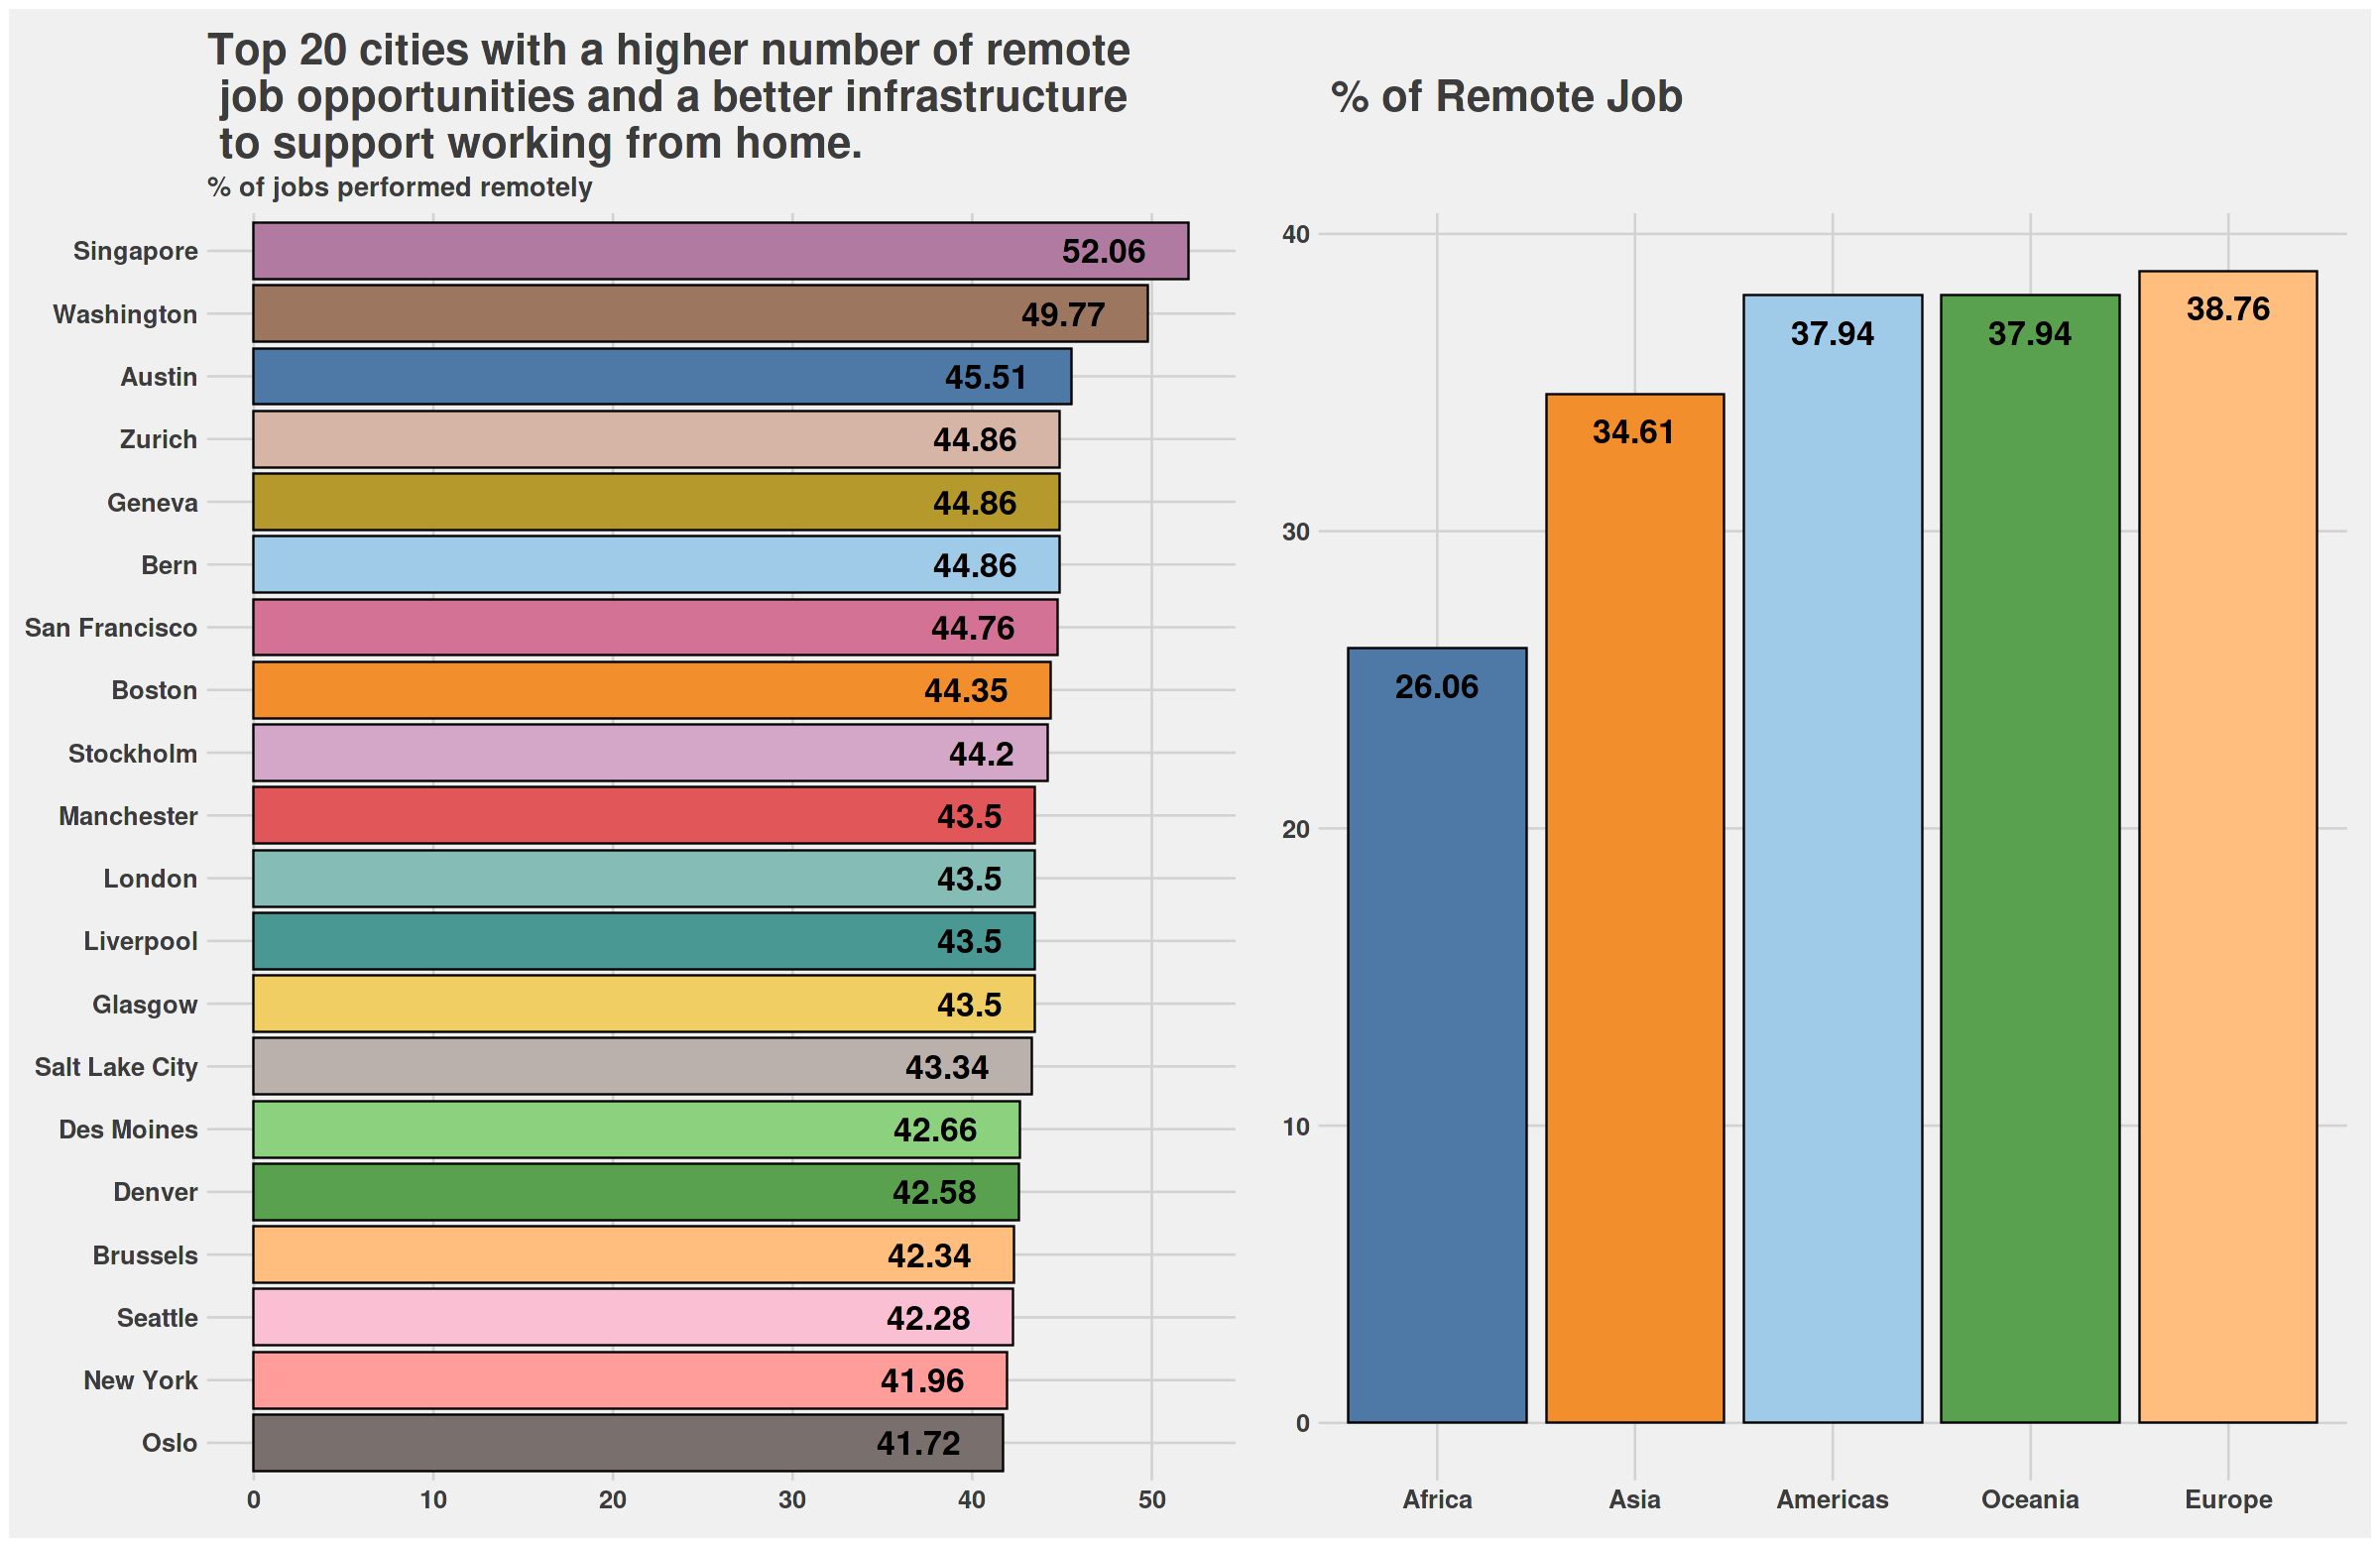

In [11]:
df1$remote_jobs = as.numeric(gsub("[\\%,]", "", df1$remote_jobs))

p1 <- df1 %>%
arrange(desc(remote_jobs))%>%
head(20)%>%
ggplot(aes(fct_reorder(city, remote_jobs),remote_jobs, fill = city))+
geom_col(color = 'black')+
geom_text(aes(label=remote_jobs), size = 7, hjust = 1.5, vjust = 0.5, fontface = 'bold')+
coord_flip()+
theme_fivethirtyeight()+
scale_fill_paletteer_d("ggthemes::Tableau_20")+
labs(title = "Top 20 cities with a higher number of remote  \n job opportunities and a better infrastructure  \n to support working from home.",
    subtitle = "% of jobs performed remotely")+
theme(axis.text.x = element_text(size = 15, face = 'bold'))+
theme(axis.text.y = element_text(size = 15, face = 'bold'))+
theme(plot.title =  element_text(size = 26, face = 'bold'))+
theme(plot.subtitle =  element_text(size = 16, face = 'bold'))+
theme(legend.position = 'none')

p2 <- df1 %>%
group_by(region)%>%
summarise(avg = round(mean(remote_jobs),2))%>%
ggplot(aes(reorder(region,avg),avg, fill = region))+
geom_col(color = 'black')+
geom_text(aes(label = avg), size = 7, hjust = 0.5, vjust = 2, fontface = 'bold')+
theme_fivethirtyeight()+
scale_fill_paletteer_d("ggthemes::Tableau_20")+
labs(title = " % of Remote Job")+
theme(axis.text.x = element_text(size = 15, face = 'bold'))+
theme(axis.text.y = element_text(size = 15, face = 'bold'))+
theme(plot.title =  element_text(size = 26, face = 'bold'))+
theme(plot.subtitle =  element_text(size = 16, face = 'bold'))+
theme(legend.position = 'none')

P = p1 + p2
P

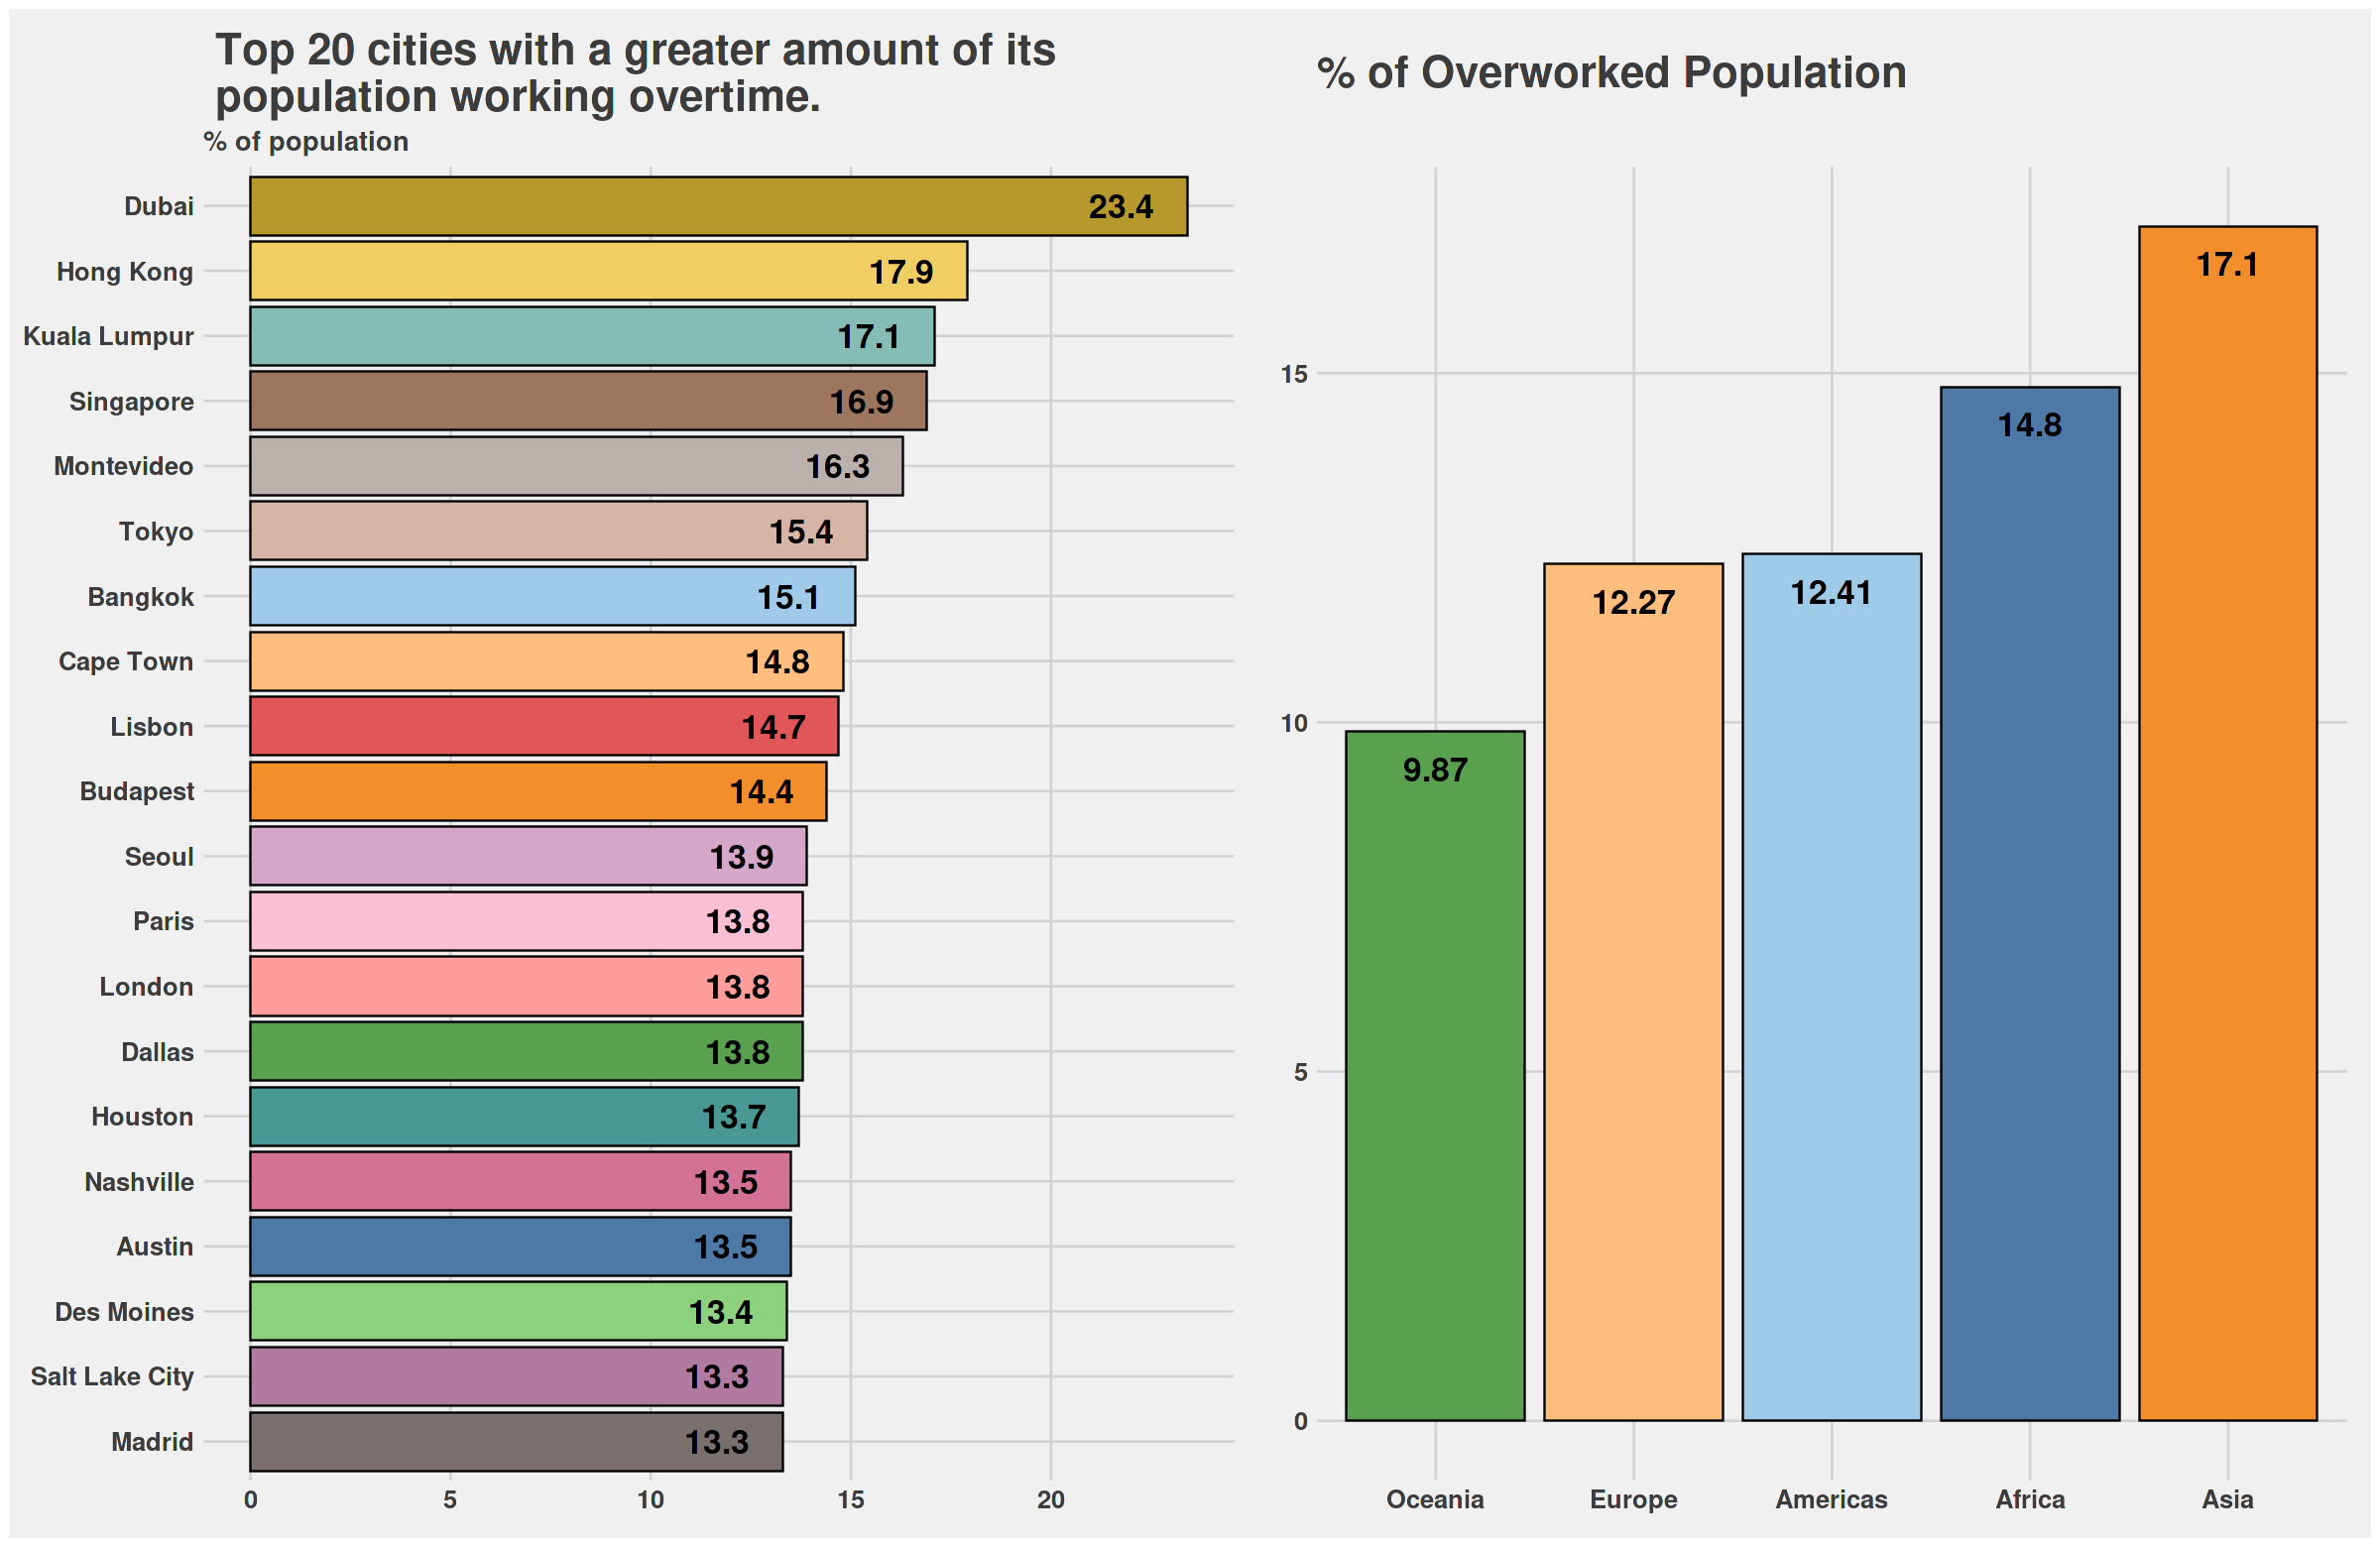

In [12]:
df1$overworked_population = as.numeric(gsub("[\\%,]", "", df1$overworked_population))

p3 <- df1 %>%
arrange(desc(overworked_population))%>%
head(20)%>%
ggplot(aes(fct_reorder(city, overworked_population),overworked_population, fill = city))+
geom_col(color = 'black')+
geom_text(aes(label = overworked_population), size = 7, hjust = 1.5, vjust = 0.5, fontface = 'bold')+
coord_flip()+
theme_fivethirtyeight()+
scale_fill_paletteer_d("ggthemes::Tableau_20")+
labs(title = " Top 20 cities with a greater amount of its \n population working overtime.",
    subtitle = "% of population")+
theme(axis.text.x = element_text(size = 15, face = 'bold'))+
theme(axis.text.y = element_text(size = 15, face = 'bold'))+
theme(plot.title =  element_text(size = 26, face = 'bold'))+
theme(plot.subtitle = element_text(size = 16, face = "bold"))+
theme(legend.position = 'none')


p4 <- df1 %>%
group_by(region)%>%
summarise(avg = round(mean(overworked_population),2))%>%
ggplot(aes(reorder(region,avg),avg, fill = region))+
geom_col(color = 'black')+
geom_text(aes(label = avg), size = 7, hjust = 0.5, vjust = 2, fontface = 'bold')+
theme_fivethirtyeight()+
scale_fill_paletteer_d("ggthemes::Tableau_20")+
labs(title = "% of Overworked Population")+
theme(axis.text.x = element_text(size = 15, face = 'bold'))+
theme(axis.text.y = element_text(size = 15, face = 'bold'))+
theme(plot.title =  element_text(size = 26, face = 'bold'))+
theme(legend.position = 'none')

P = p3+p4
P

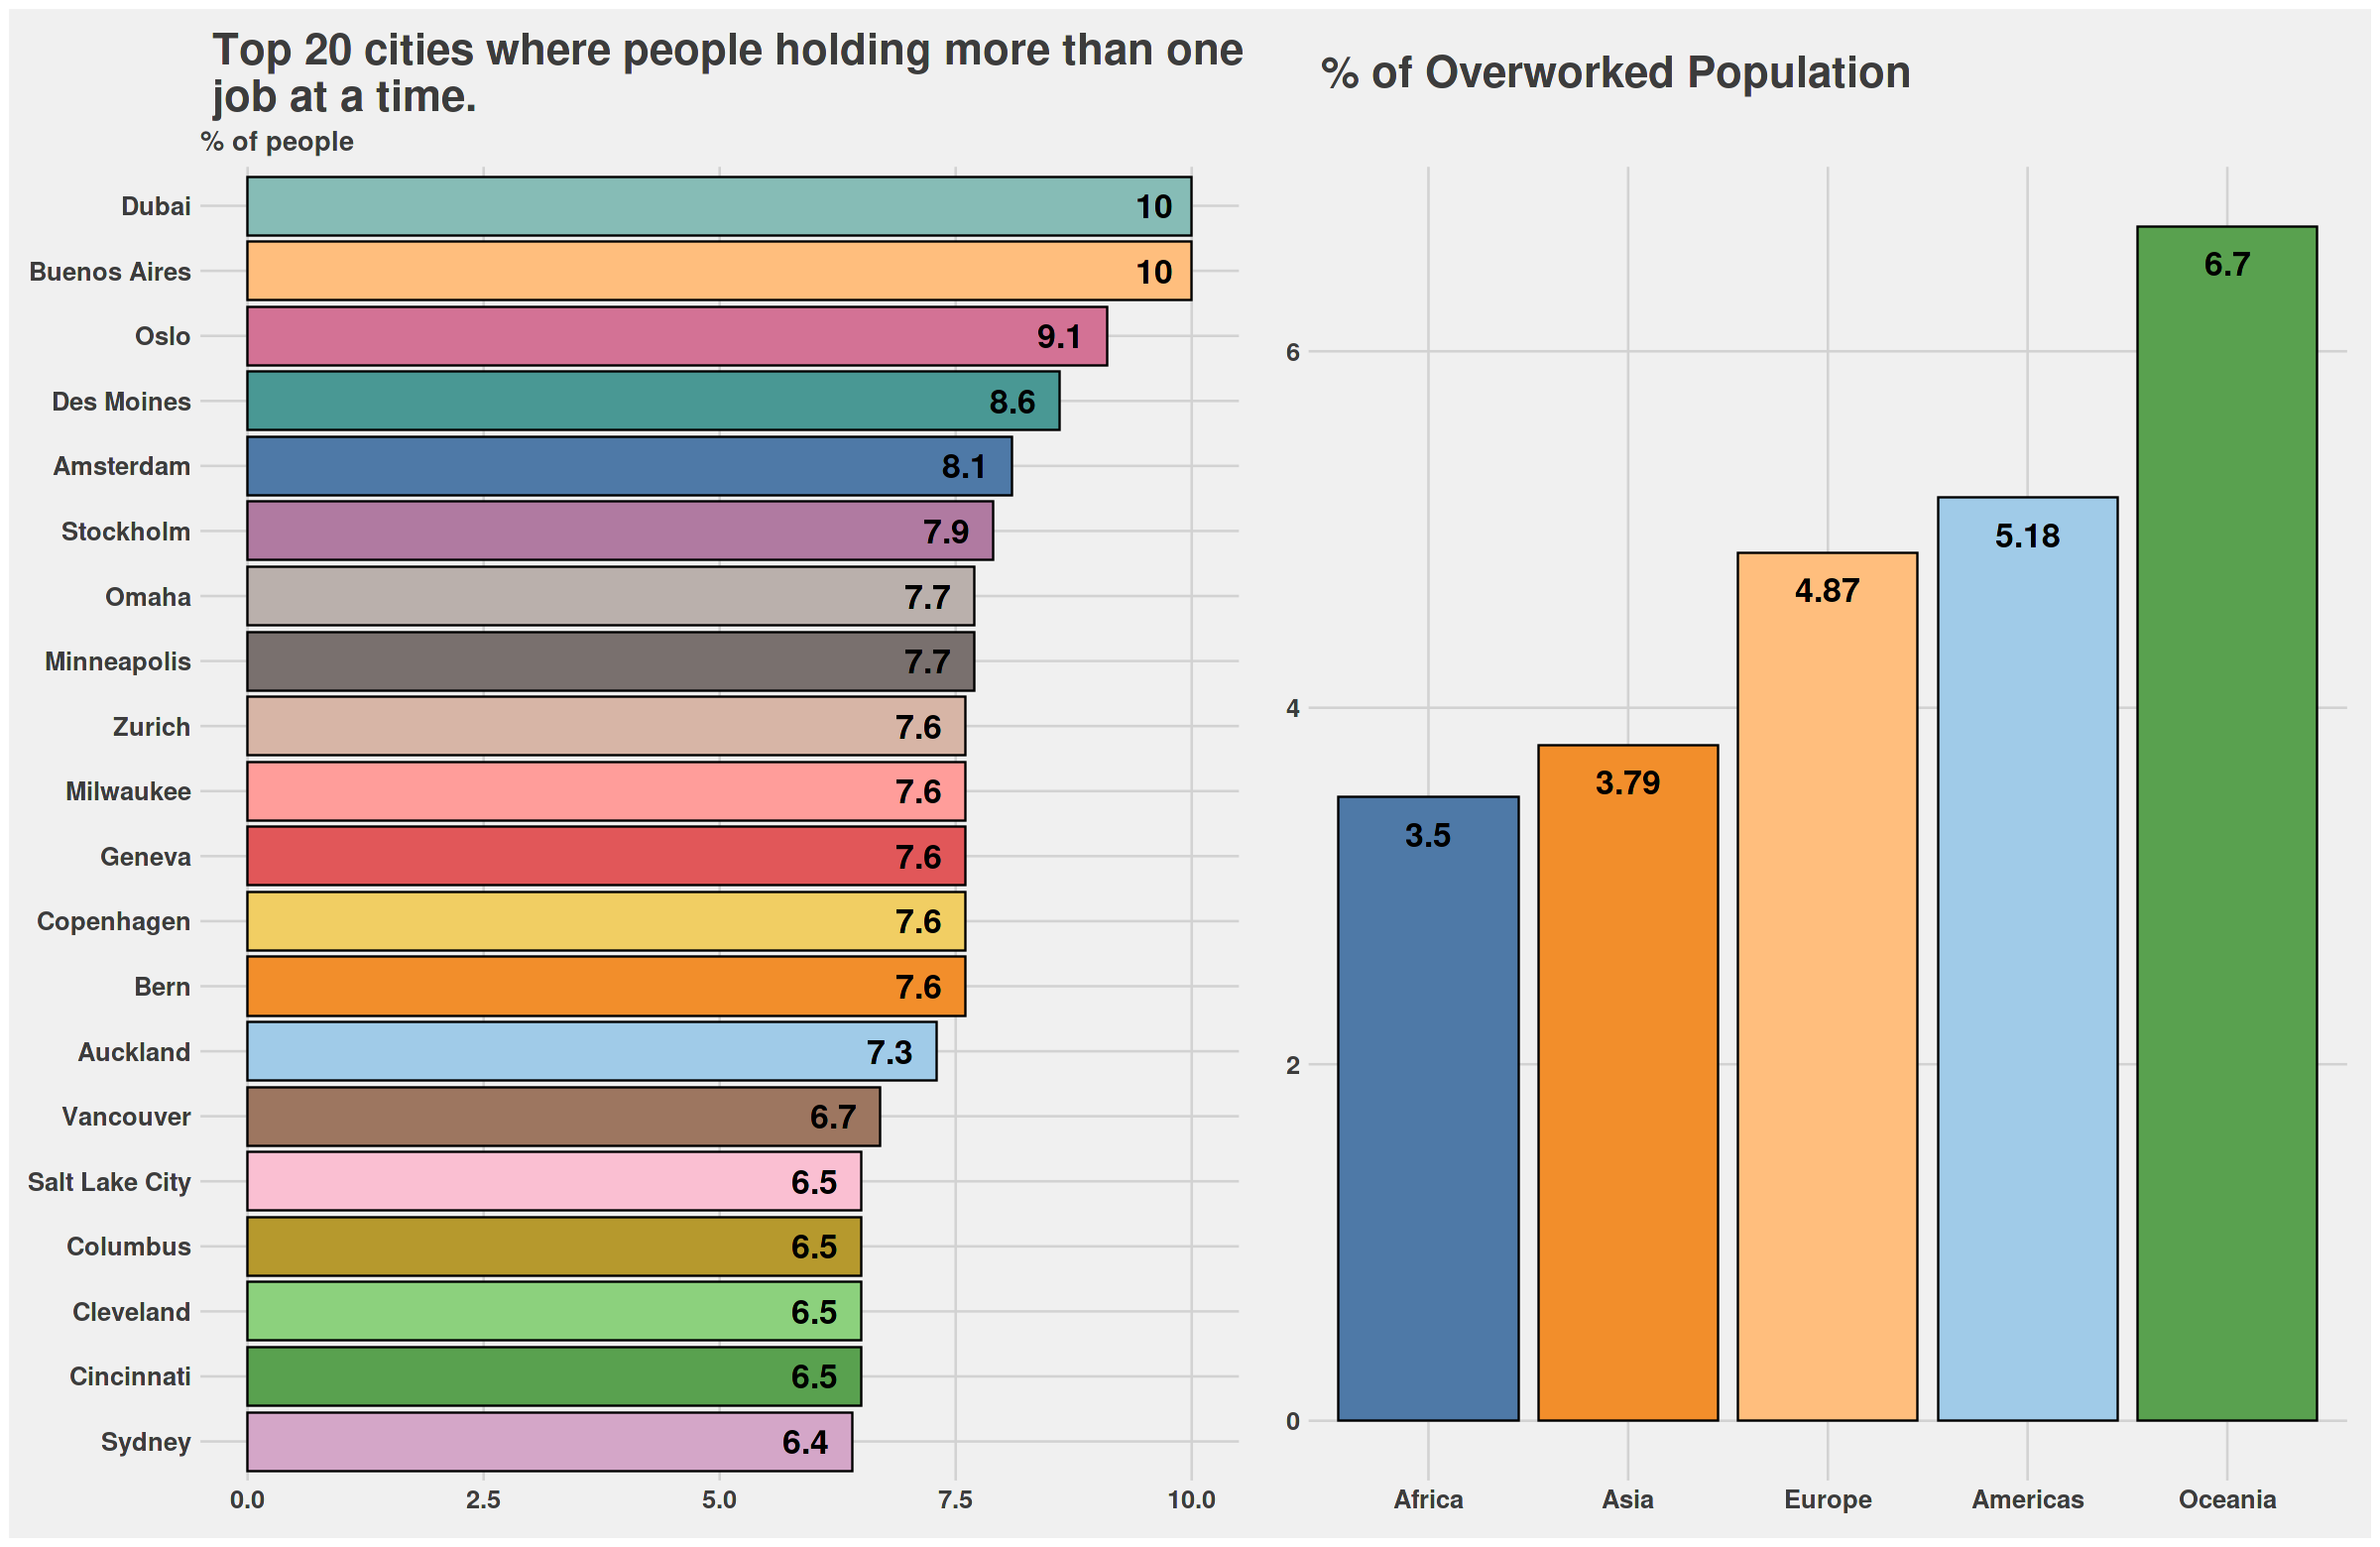

In [13]:
df1$multiple_jobholders = as.numeric(gsub("[\\%,]", "", df1$multiple_jobholders))

p5 <- df1 %>%
arrange(desc(multiple_jobholders))%>%
head(20)%>%
ggplot(aes(fct_reorder(city, multiple_jobholders),multiple_jobholders, fill = city))+
geom_col(color = 'black')+
geom_text(aes(label = multiple_jobholders), size = 7, hjust = 1.5, vjust = 0.5, fontface = 'bold')+
coord_flip()+
theme_fivethirtyeight()+
scale_fill_paletteer_d("ggthemes::Tableau_20")+
labs(title = " Top 20 cities where people holding more than one \n job at a time.",
    subtitle = "% of people")+
theme(axis.text.x = element_text(size = 15, face = 'bold'))+
theme(axis.text.y = element_text(size = 15, face = 'bold'))+
theme(plot.title =  element_text(size = 26, face = 'bold'))+
theme(plot.subtitle = element_text(size = 16, face = "bold"))+
theme(legend.position = 'none')

p6 <- df1 %>%
group_by(region)%>%
summarise(avg = round(mean(multiple_jobholders),2))%>%
ggplot(aes(reorder(region,avg),avg, fill = region))+
geom_col(color = 'black')+
geom_text(aes(label = avg), size = 7, hjust = 0.5, vjust = 2, fontface = 'bold')+
theme_fivethirtyeight()+
scale_fill_paletteer_d("ggthemes::Tableau_20")+
labs(title = " % of Overworked Population")+
theme(axis.text.x = element_text(size = 15, face = 'bold'))+
theme(axis.text.y = element_text(size = 15, face = 'bold'))+
theme(plot.title =  element_text(size = 26, face = 'bold'))+
theme(legend.position = 'none')

P = p5+p6
P

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


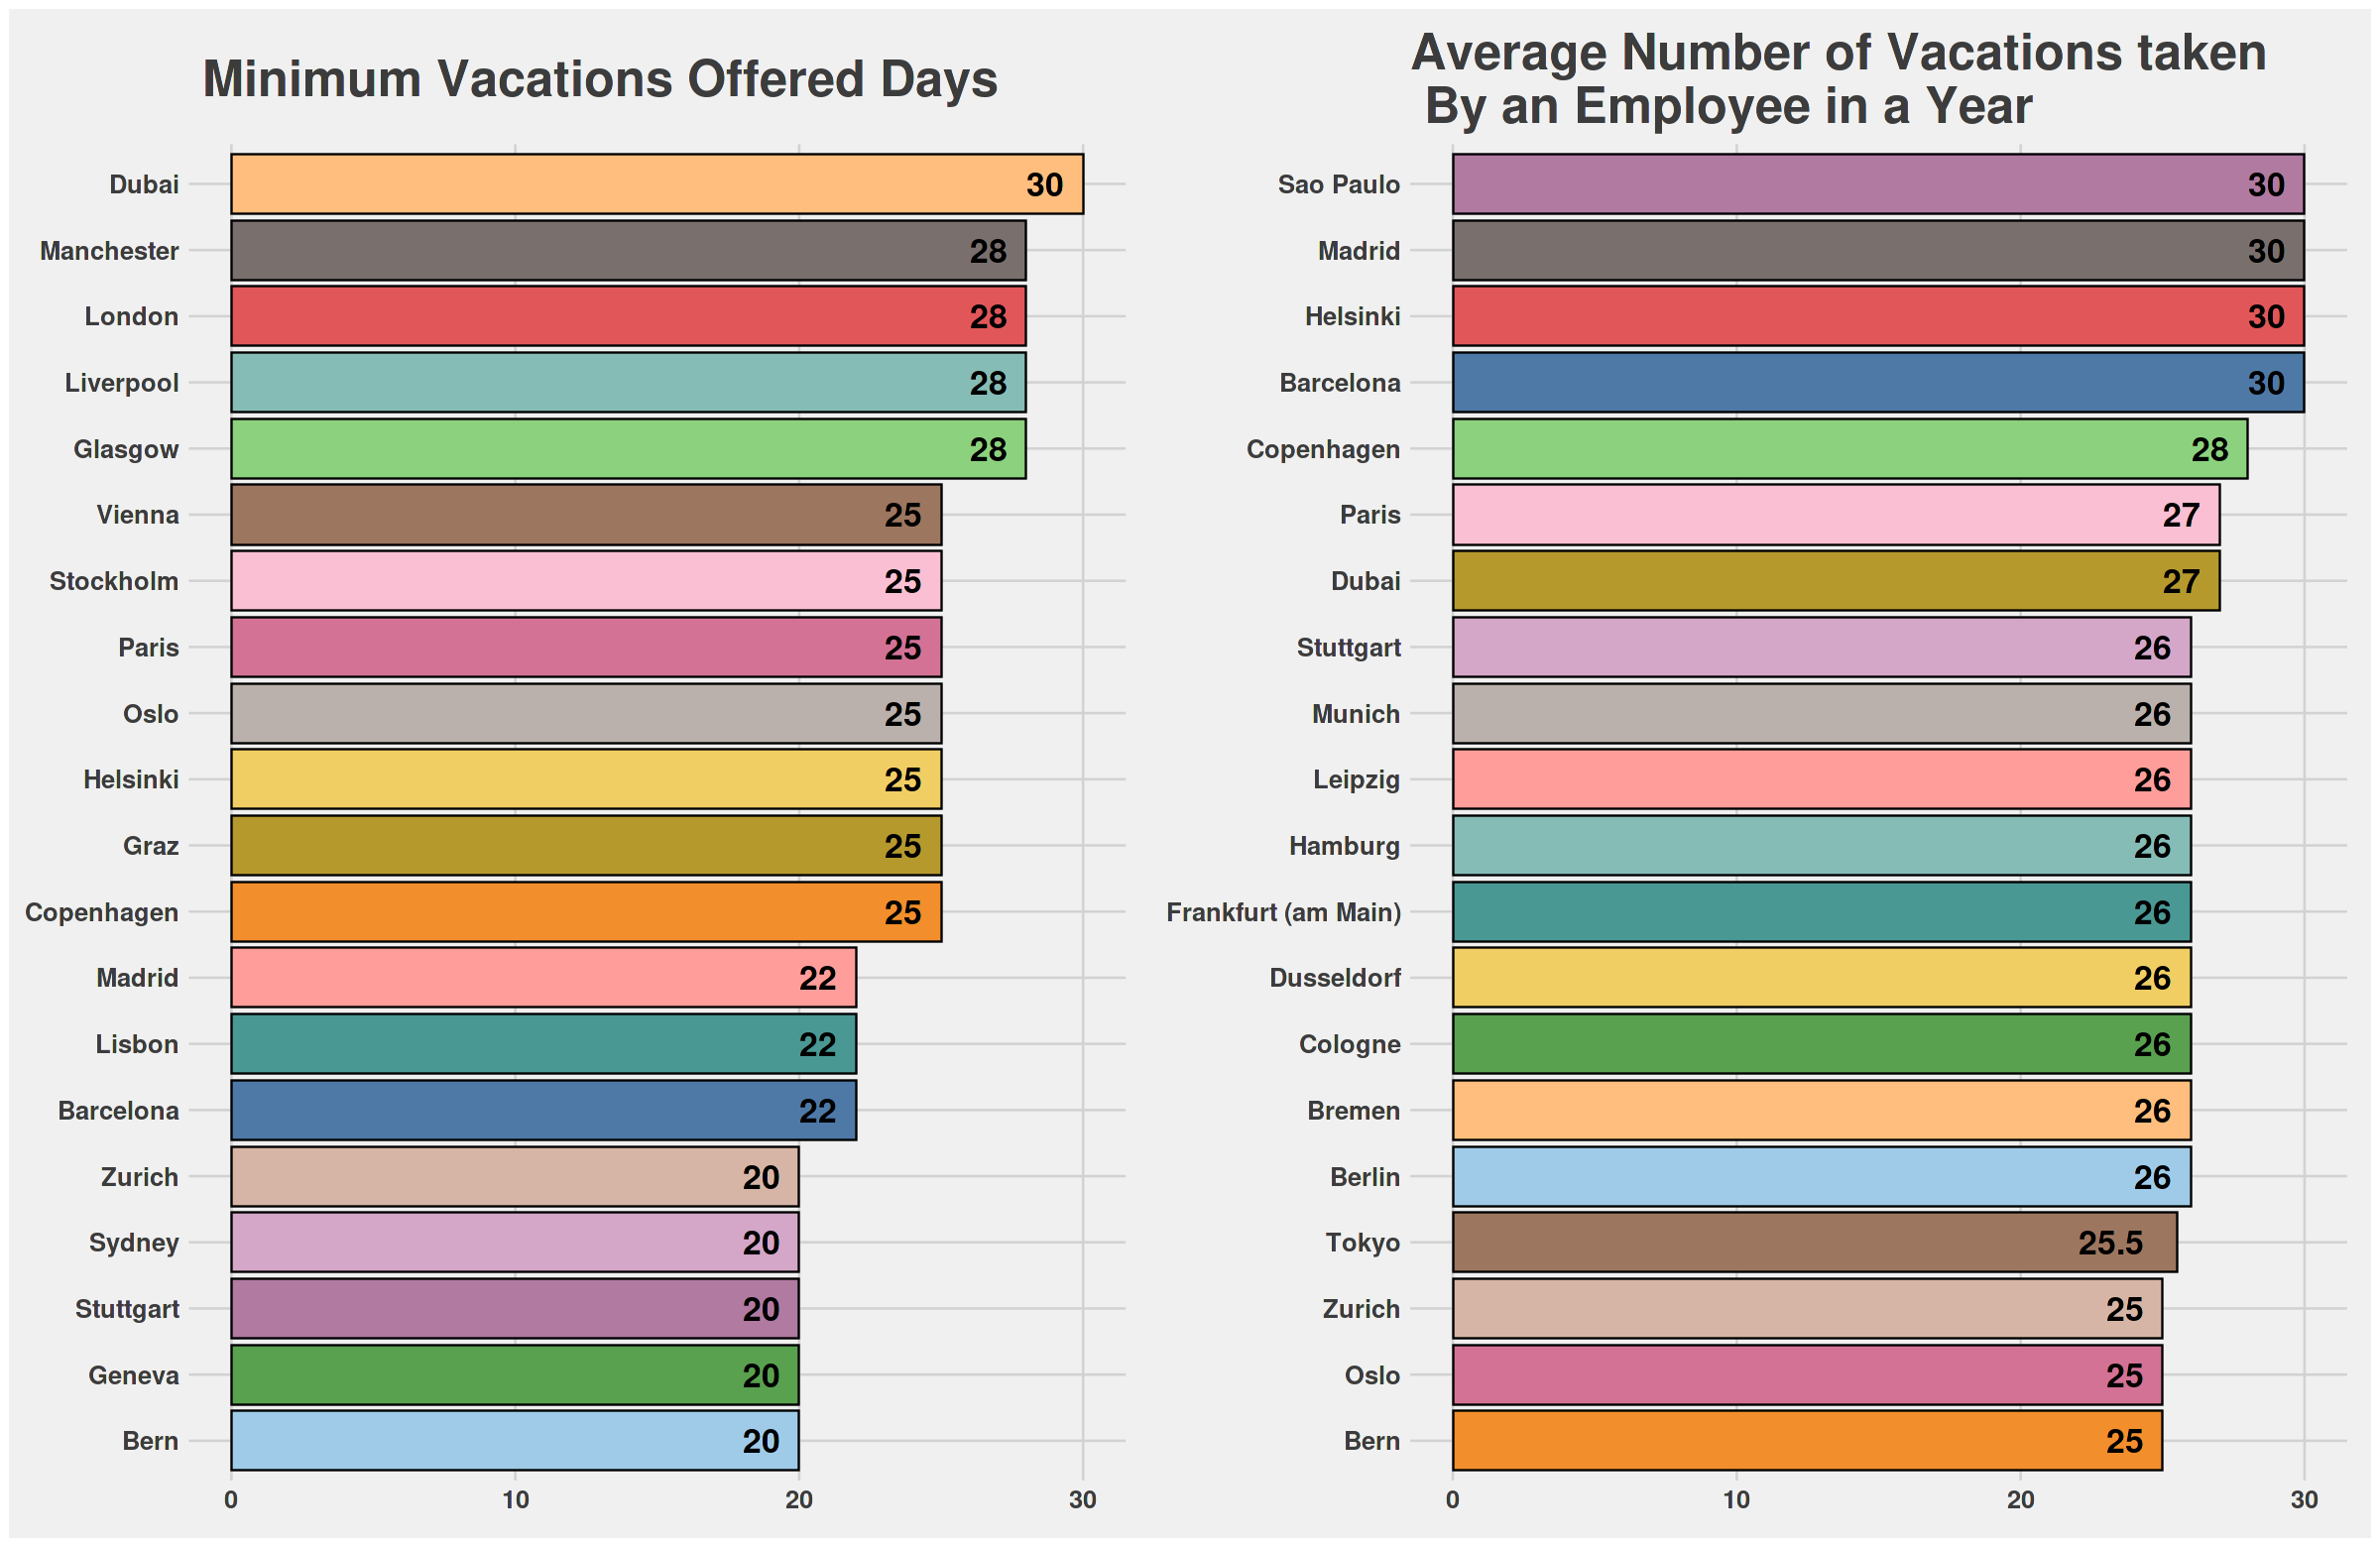

In [14]:
min_vac <- df1 %>%
arrange(desc(minimum_vacations_offered_days))%>%
head(20)%>%
ggplot(aes(fct_reorder(city, minimum_vacations_offered_days),minimum_vacations_offered_days, fill = city))+
geom_col(color = 'black')+
geom_text(aes(label = minimum_vacations_offered_days), size = 7, hjust = 1.5, vjust = 0.5, fontface = 'bold')+
scale_fill_paletteer_d("ggthemes::Tableau_20")+
coord_flip()+
theme_fivethirtyeight()+
labs(title = " Minimum Vacations Offered Days")+
theme(axis.text.x = element_text(size = 15, face = 'bold'))+
theme(axis.text.y = element_text(size = 15, face = 'bold'))+
theme(plot.title =  element_text(size = 30, face = 'bold'))+
theme(legend.position = 'none')


df1$vacations_taken_days <- as.numeric(df1$vacations_taken_days)

avg_vac <- df1 %>%
arrange(desc(vacations_taken_days))%>%
head(20)%>%
ggplot(aes(fct_reorder(city, vacations_taken_days),vacations_taken_days, fill = city))+
geom_col(color = 'black')+
geom_text(aes(label = vacations_taken_days), size = 7, hjust = 1.5, vjust = 0.5, fontface = 'bold')+
scale_fill_paletteer_d("ggthemes::Tableau_20")+
coord_flip()+
theme_fivethirtyeight()+
labs(title = "Average Number of Vacations taken \n By an Employee in a Year")+
theme(axis.text.x = element_text(size = 15, face = 'bold'))+
theme(axis.text.y = element_text(size = 15, face = 'bold'))+
theme(plot.title =  element_text(size = 30, face = 'bold'))+
theme(legend.position = 'none')

P = min_vac + avg_vac
P

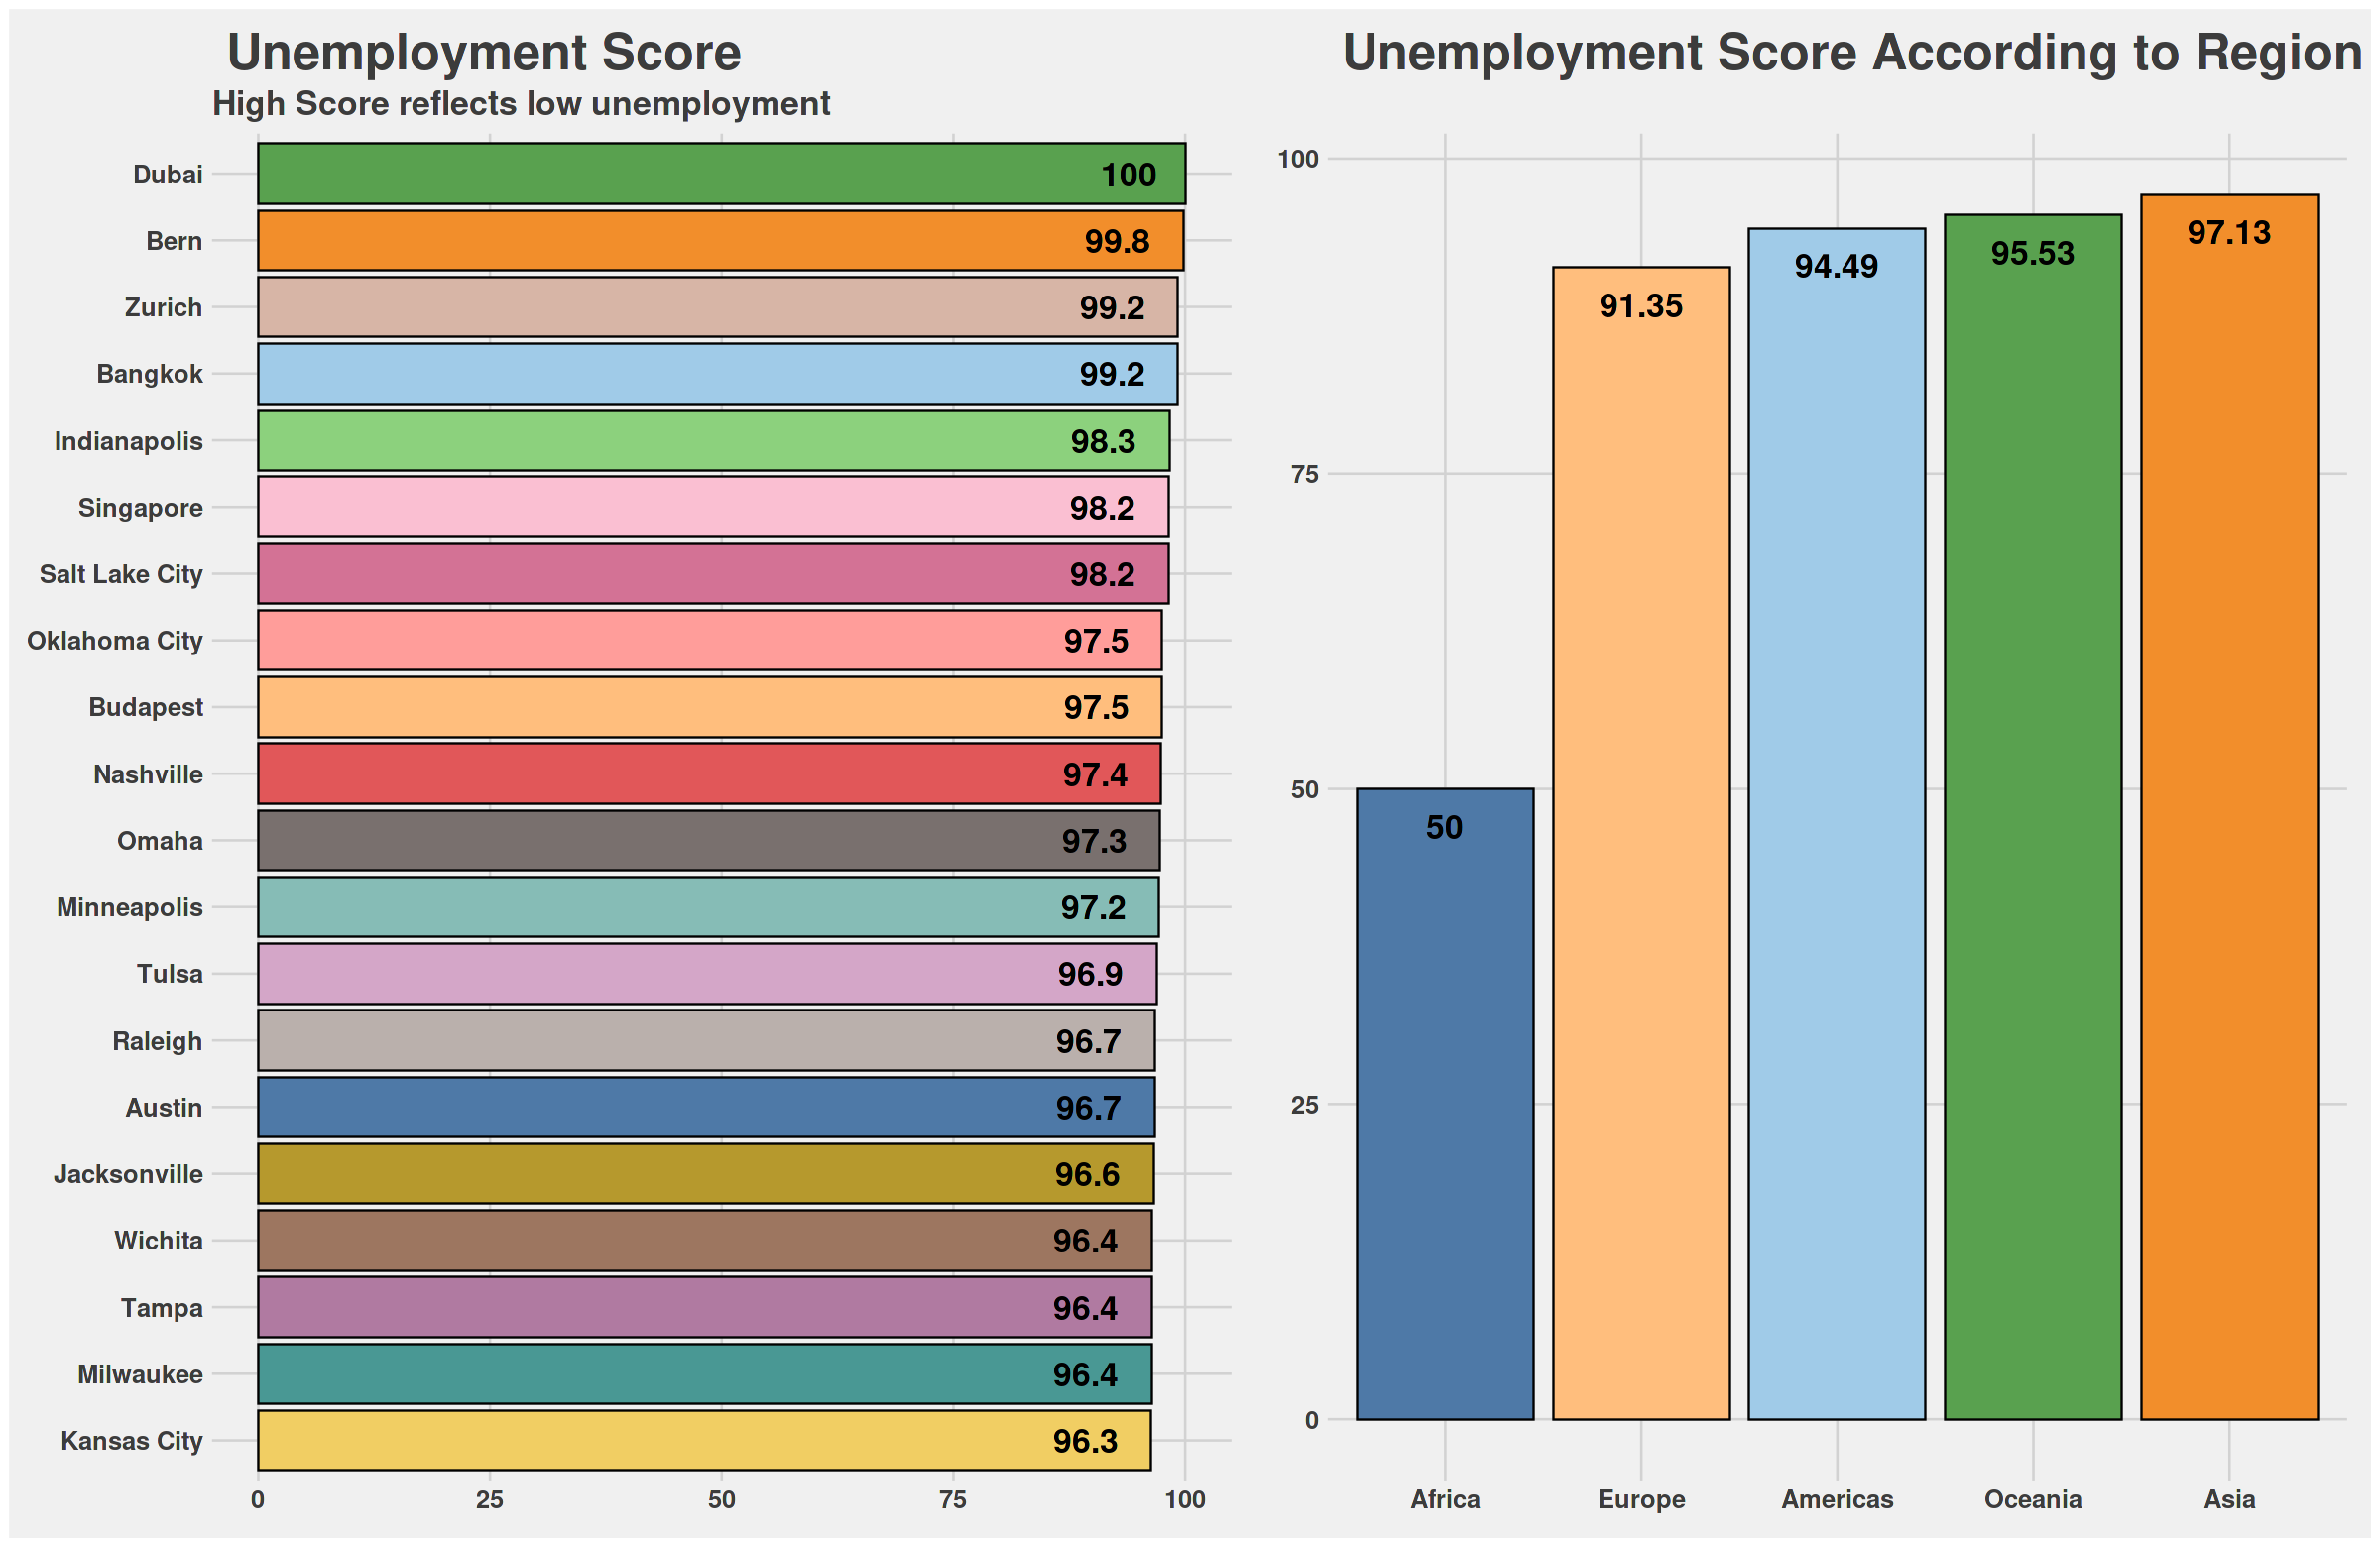

In [15]:
p7 <- df1 %>%
arrange(desc(unemployment))%>%
head(20)%>%
ggplot(aes(fct_reorder(city, unemployment),unemployment, fill = city))+
geom_col(color = 'black')+
geom_text(aes(label = unemployment), size = 7, hjust = 1.5, vjust = 0.5, fontface = 'bold')+
coord_flip()+
theme_fivethirtyeight()+
scale_fill_paletteer_d("ggthemes::Tableau_20")+
labs(title = " Unemployment Score",
    subtitle = "High Score reflects low unemployment")+
theme(axis.text.x = element_text(size = 15, face = 'bold'))+
theme(axis.text.y = element_text(size = 15, face = 'bold'))+
theme(plot.title =  element_text(size = 30, face = 'bold'))+
theme(plot.subtitle =  element_text(size = 20, face = 'bold'))+
theme(legend.position = 'none')

p8 <- df1 %>%
group_by(region)%>%
summarise(avg_une = round(mean(unemployment),2))%>%
ggplot(aes(reorder(region,avg_une),avg_une, fill = region))+
geom_col(color = 'black')+
geom_text(aes(label = avg_une), size = 7, hjust = 0.5, vjust = 2, fontface = 'bold')+
theme_fivethirtyeight()+
scale_fill_paletteer_d("ggthemes::Tableau_20")+
labs(title = " Unemployment Score According to Region")+
theme(axis.text.x = element_text(size = 15, face = 'bold'))+
theme(axis.text.y = element_text(size = 15, face = 'bold'))+
theme(plot.title =  element_text(size = 30, face = 'bold'))+
theme(legend.position = 'none')

P = p7+p8
P

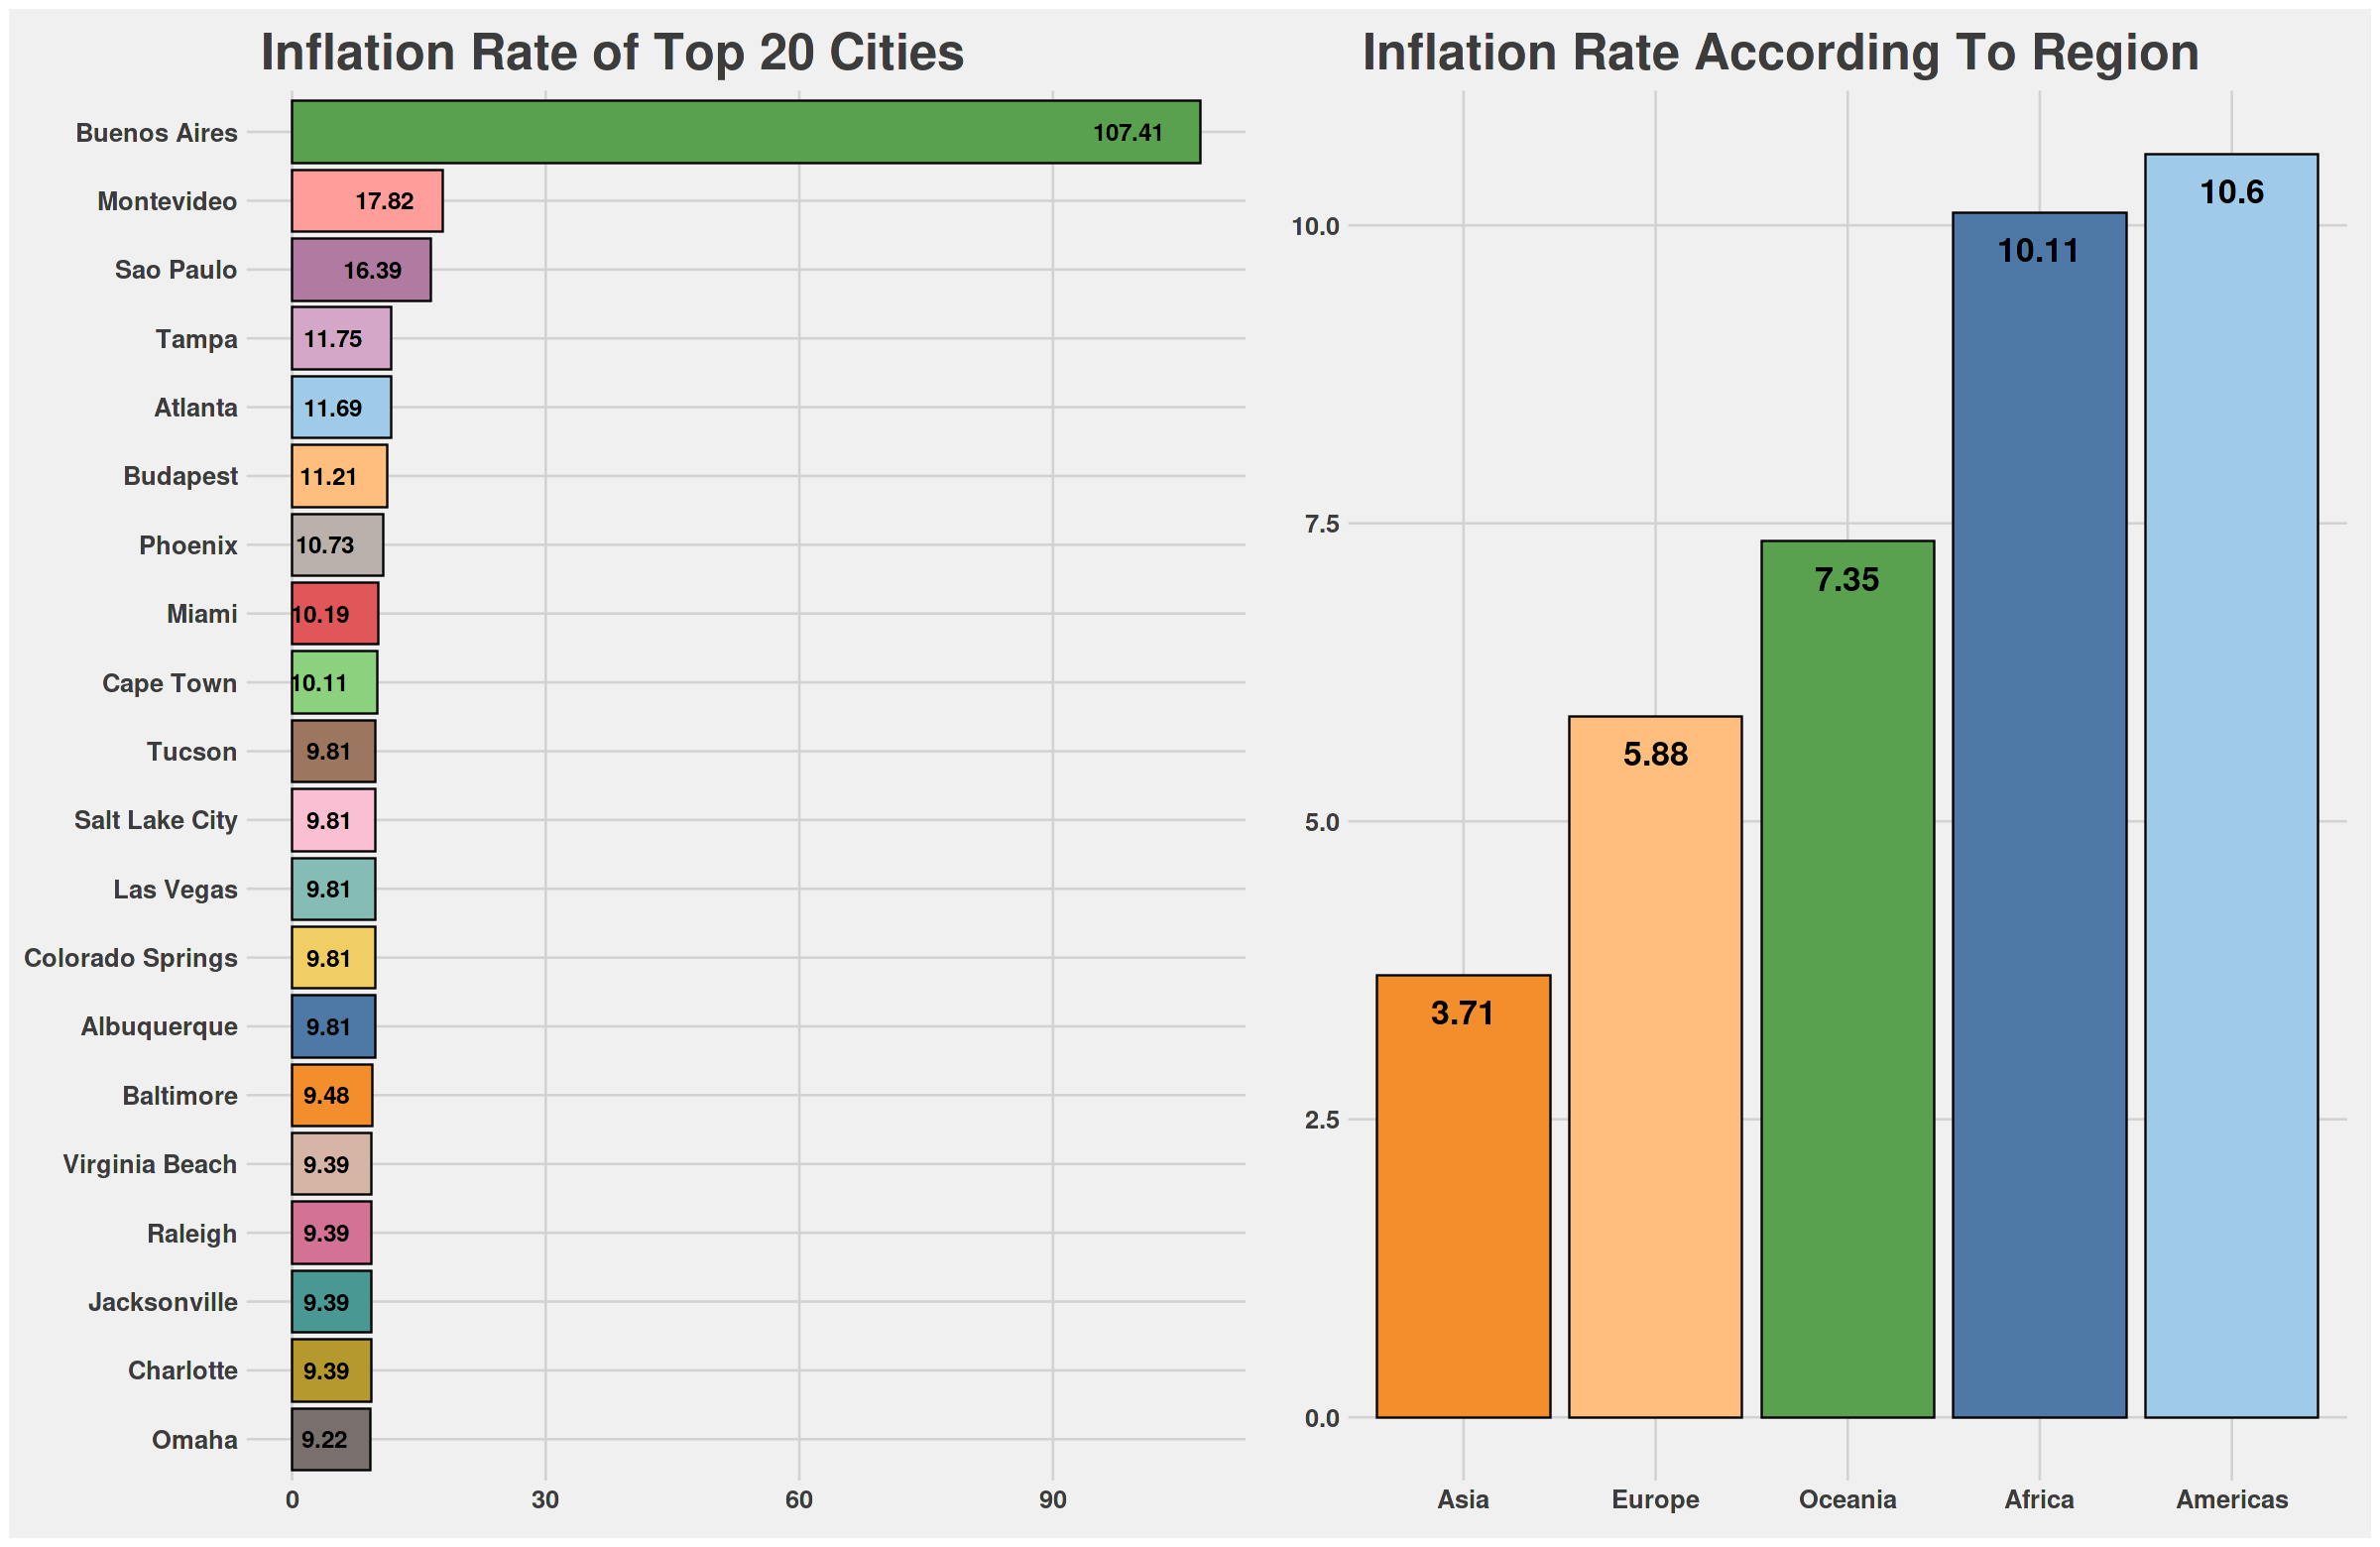

In [16]:
df1$inflation = as.numeric(gsub("[\\%,]", "", df1$inflation))

p9 <- df1 %>%
arrange(desc(inflation))%>%
head(20)%>%
ggplot(aes(fct_reorder(city, inflation),inflation, fill = city))+
geom_col(color = 'black')+
geom_text(aes(label = inflation), size = 5, hjust = 1.5, vjust = 0.5, fontface = 'bold')+
coord_flip()+
theme_fivethirtyeight()+
scale_fill_paletteer_d("ggthemes::Tableau_20")+
labs(title = " Inflation Rate of Top 20 Cities")+
theme(axis.text.x = element_text(size = 15, face = 'bold'))+
theme(axis.text.y = element_text(size = 15, face = 'bold'))+
theme(plot.title =  element_text(size = 30, face = 'bold'))+
theme(legend.position = 'none')

p10 <- df1 %>%
group_by(region)%>%
summarise(avg_inf = round(mean(inflation),2))%>%
ggplot(aes(reorder(region,avg_inf),avg_inf, fill = region))+
geom_col(color = 'black')+
geom_text(aes(label = avg_inf), size = 7, hjust = 0.5, vjust = 2, fontface = 'bold')+
theme_fivethirtyeight()+
scale_fill_paletteer_d("ggthemes::Tableau_20")+
labs(title = " Inflation Rate According To Region")+
theme(axis.text.x = element_text(size = 15, face = 'bold'))+
theme(axis.text.y = element_text(size = 15, face = 'bold'))+
theme(plot.title =  element_text(size = 30, face = 'bold'))+
theme(legend.position = 'none')

P = p9 + p10
P

# Society and Institutions

`covid_impact` : A score that reflects the social and economic impact of a location’s Covid response, split across three areas: public health, economic, and social. The public health impact is quantified through cases and deaths relative to population; the economic impact through year-on-year GDP growth in 2020 and 2021; and the social impact through the severity of limiting measures put in place to contain the pandemic, and changes in mobility patterns as an indicator of the effect of these restrictions. A higher score reflects a more mitigated impact of the Covid-19 pandemic.

`covid_support` : A score that reflects the income support provided by governments to workers affected by the economic effects of Covid. The score takes into account government programmes to replace income lost due to Covid, duration of unemployment benefits, consumer confidence, household spending and general wage levels, as well as overall government spending to lessen the economic impact of Covid. In addition, the number of Covid cases and deaths were taken into account.

`healthcare` : A score that rates a city’s healthcare system based on accessibility, quality of care and satisfaction.A higher score reflects greater accessibility, quality of care and user rating for each city's healthcare infrastructure. city level.

`access_to_mental_healthcare` : A score that reflects the accessibility and effectiveness of governments’ implementation of mental health policies catering for individuals with mental health illnesses.A higher score reflects a more effective and accessible mental healthcare network.

`inclusivity_and_tolerance` : The score examines the extent of equality and protection with an emphasis on employment rights, legislation, access to healthcare, as well as political representation for the LGBT+ community. A higher score reflects a higher degree of LGBT+ equality.

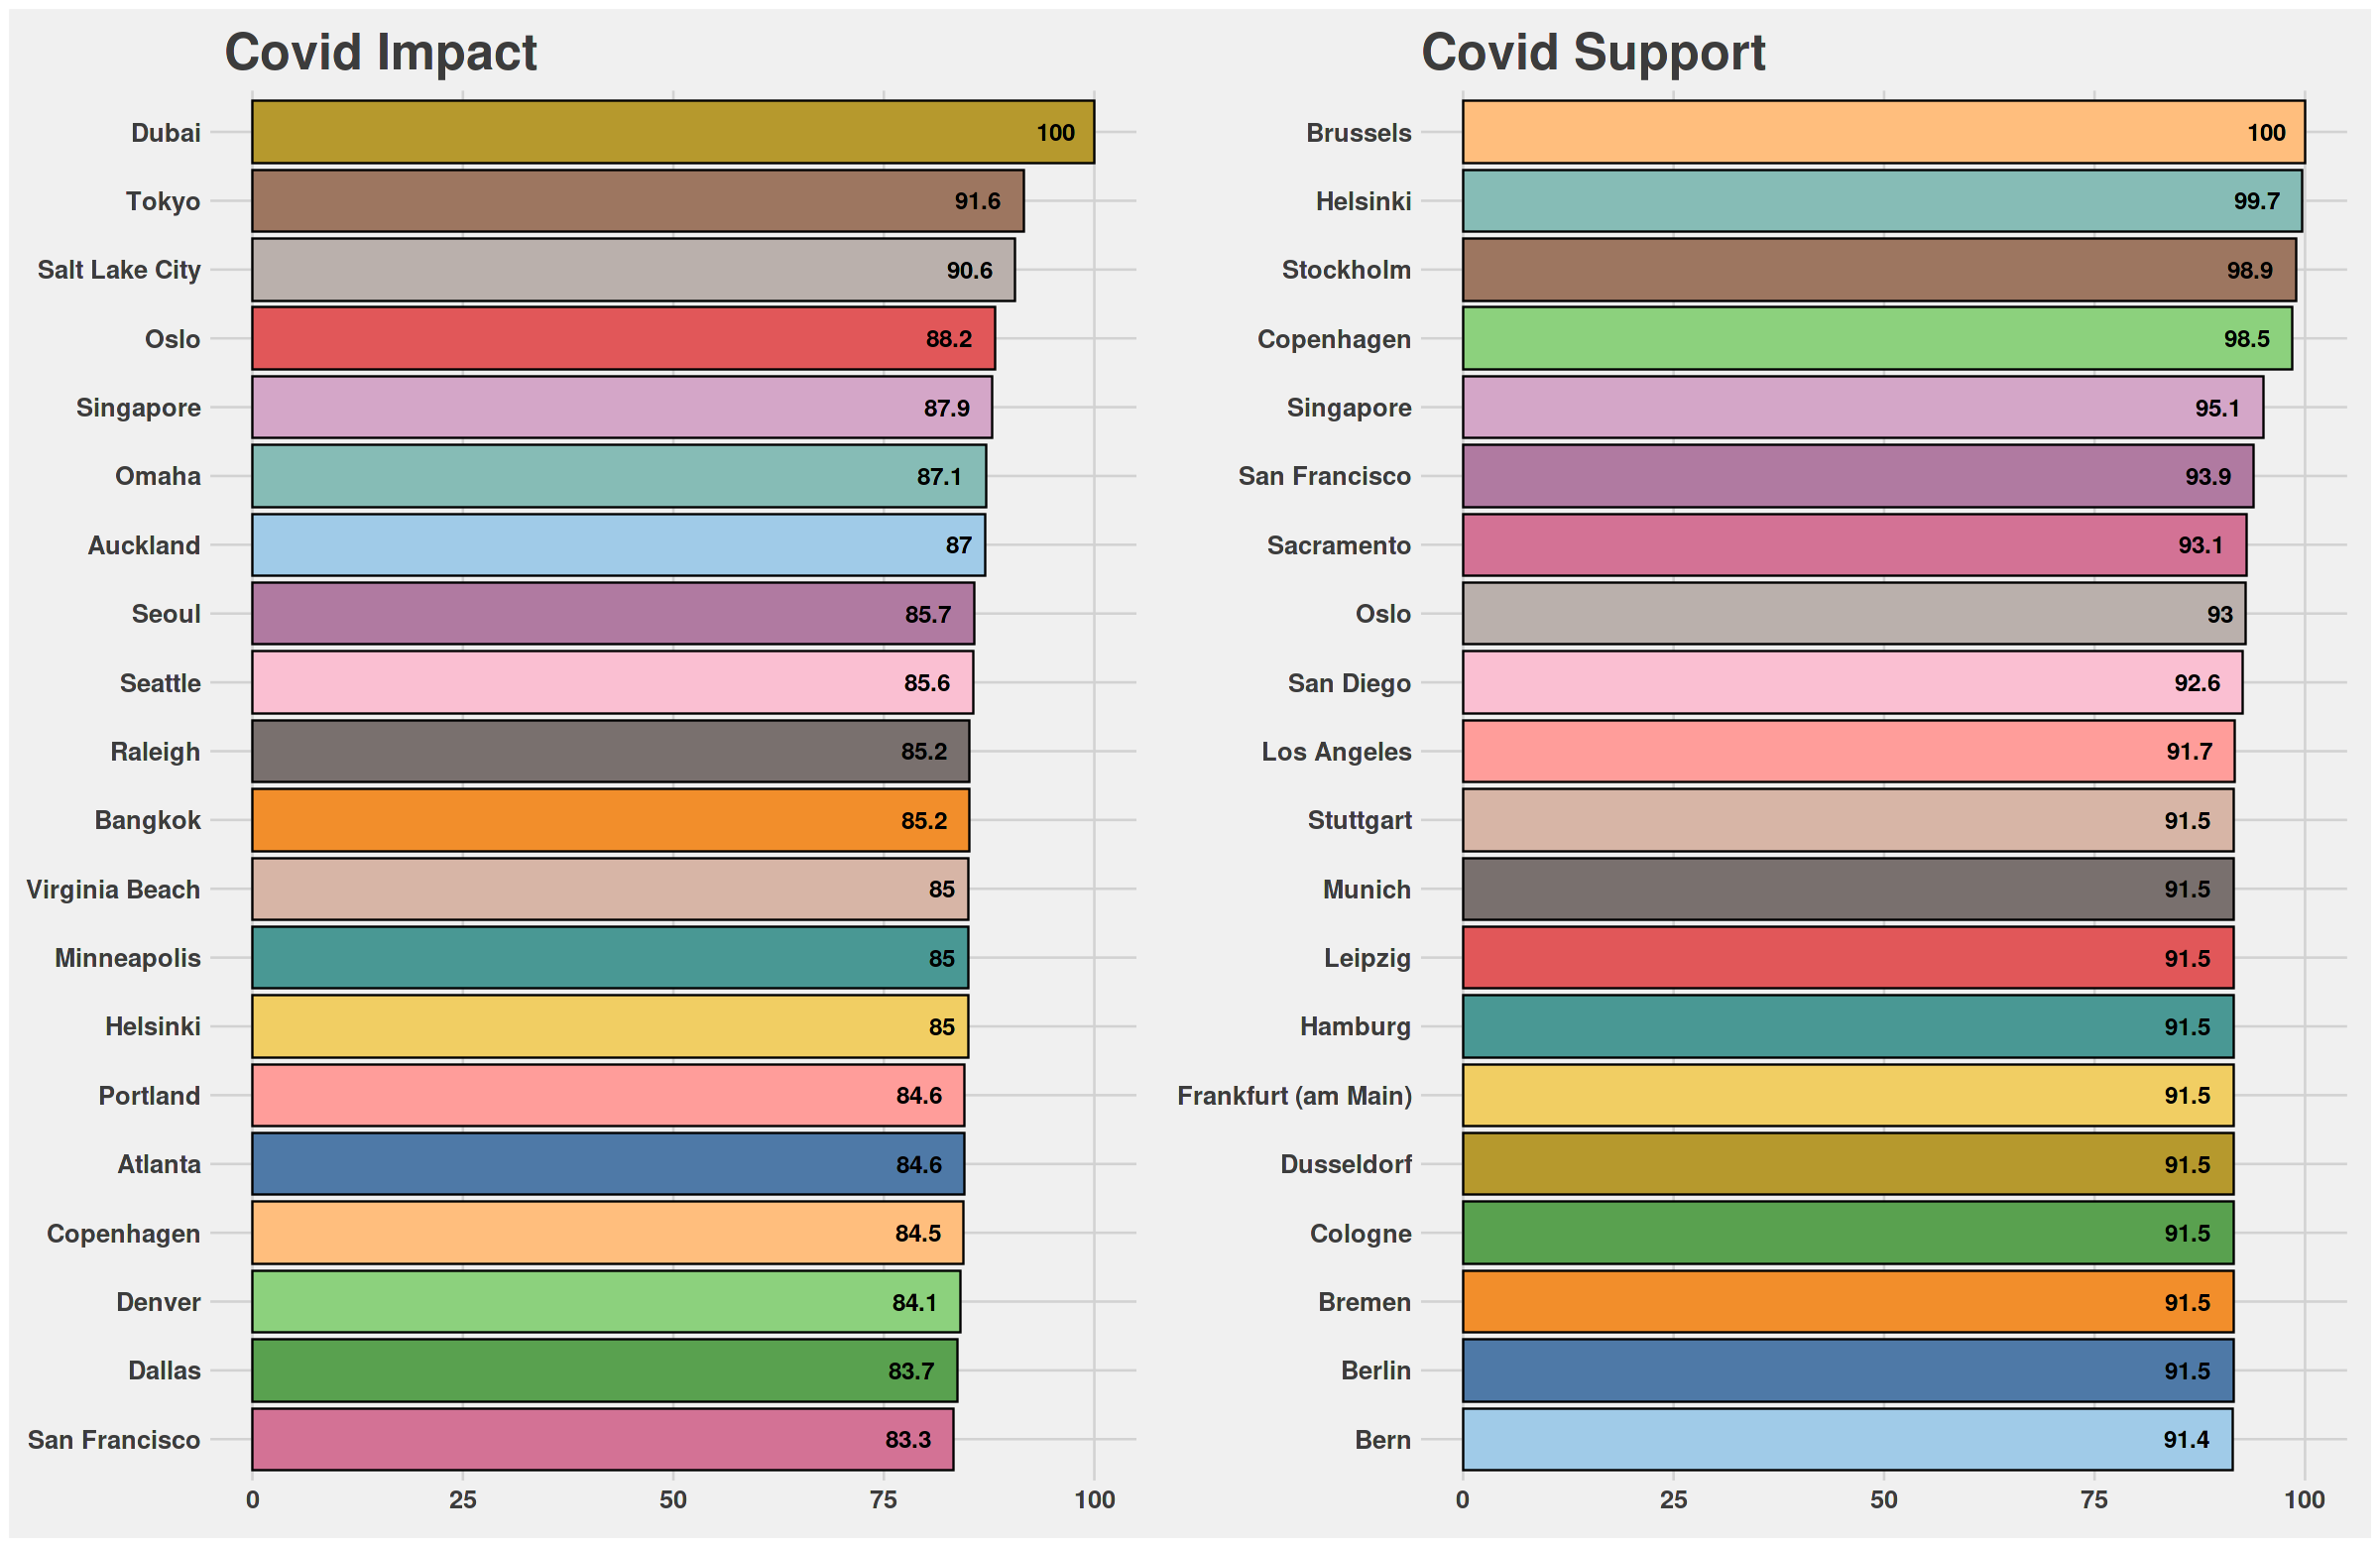

In [17]:
covid_impact <- df1 %>%
arrange(desc(covid_impact))%>%
head(20)%>%
ggplot(aes(fct_reorder(city, covid_impact),covid_impact, fill = city))+
geom_col(color = 'black')+
geom_text(aes(label = covid_impact), size = 5, hjust = 1.5, vjust = 0.5, fontface = 'bold')+
coord_flip()+
theme_fivethirtyeight()+
scale_fill_paletteer_d("ggthemes::Tableau_20")+
labs(title = " Covid Impact")+
theme(axis.text.x = element_text(size = 15, face = 'bold'))+
theme(axis.text.y = element_text(size = 15, face = 'bold'))+
theme(plot.title =  element_text(size = 30, face = 'bold'))+
theme(legend.position = 'none')


covid_support <- df1 %>%
arrange(desc(covid_support))%>%
head(20)%>%
ggplot(aes(fct_reorder(city, covid_support),covid_support, fill = city))+
geom_col(color = 'black')+
geom_text(aes(label = covid_support), size = 5, hjust = 1.5, vjust = 0.5, fontface = 'bold')+
coord_flip()+
theme_fivethirtyeight()+
scale_fill_paletteer_d("ggthemes::Tableau_20")+
labs(title = "Covid Support")+
theme(axis.text.x = element_text(size = 15, face = 'bold'))+
theme(axis.text.y = element_text(size = 15, face = 'bold'))+
theme(plot.title =  element_text(size = 30, face = 'bold'))+
theme(legend.position = 'none')

P = covid_impact + covid_support
P

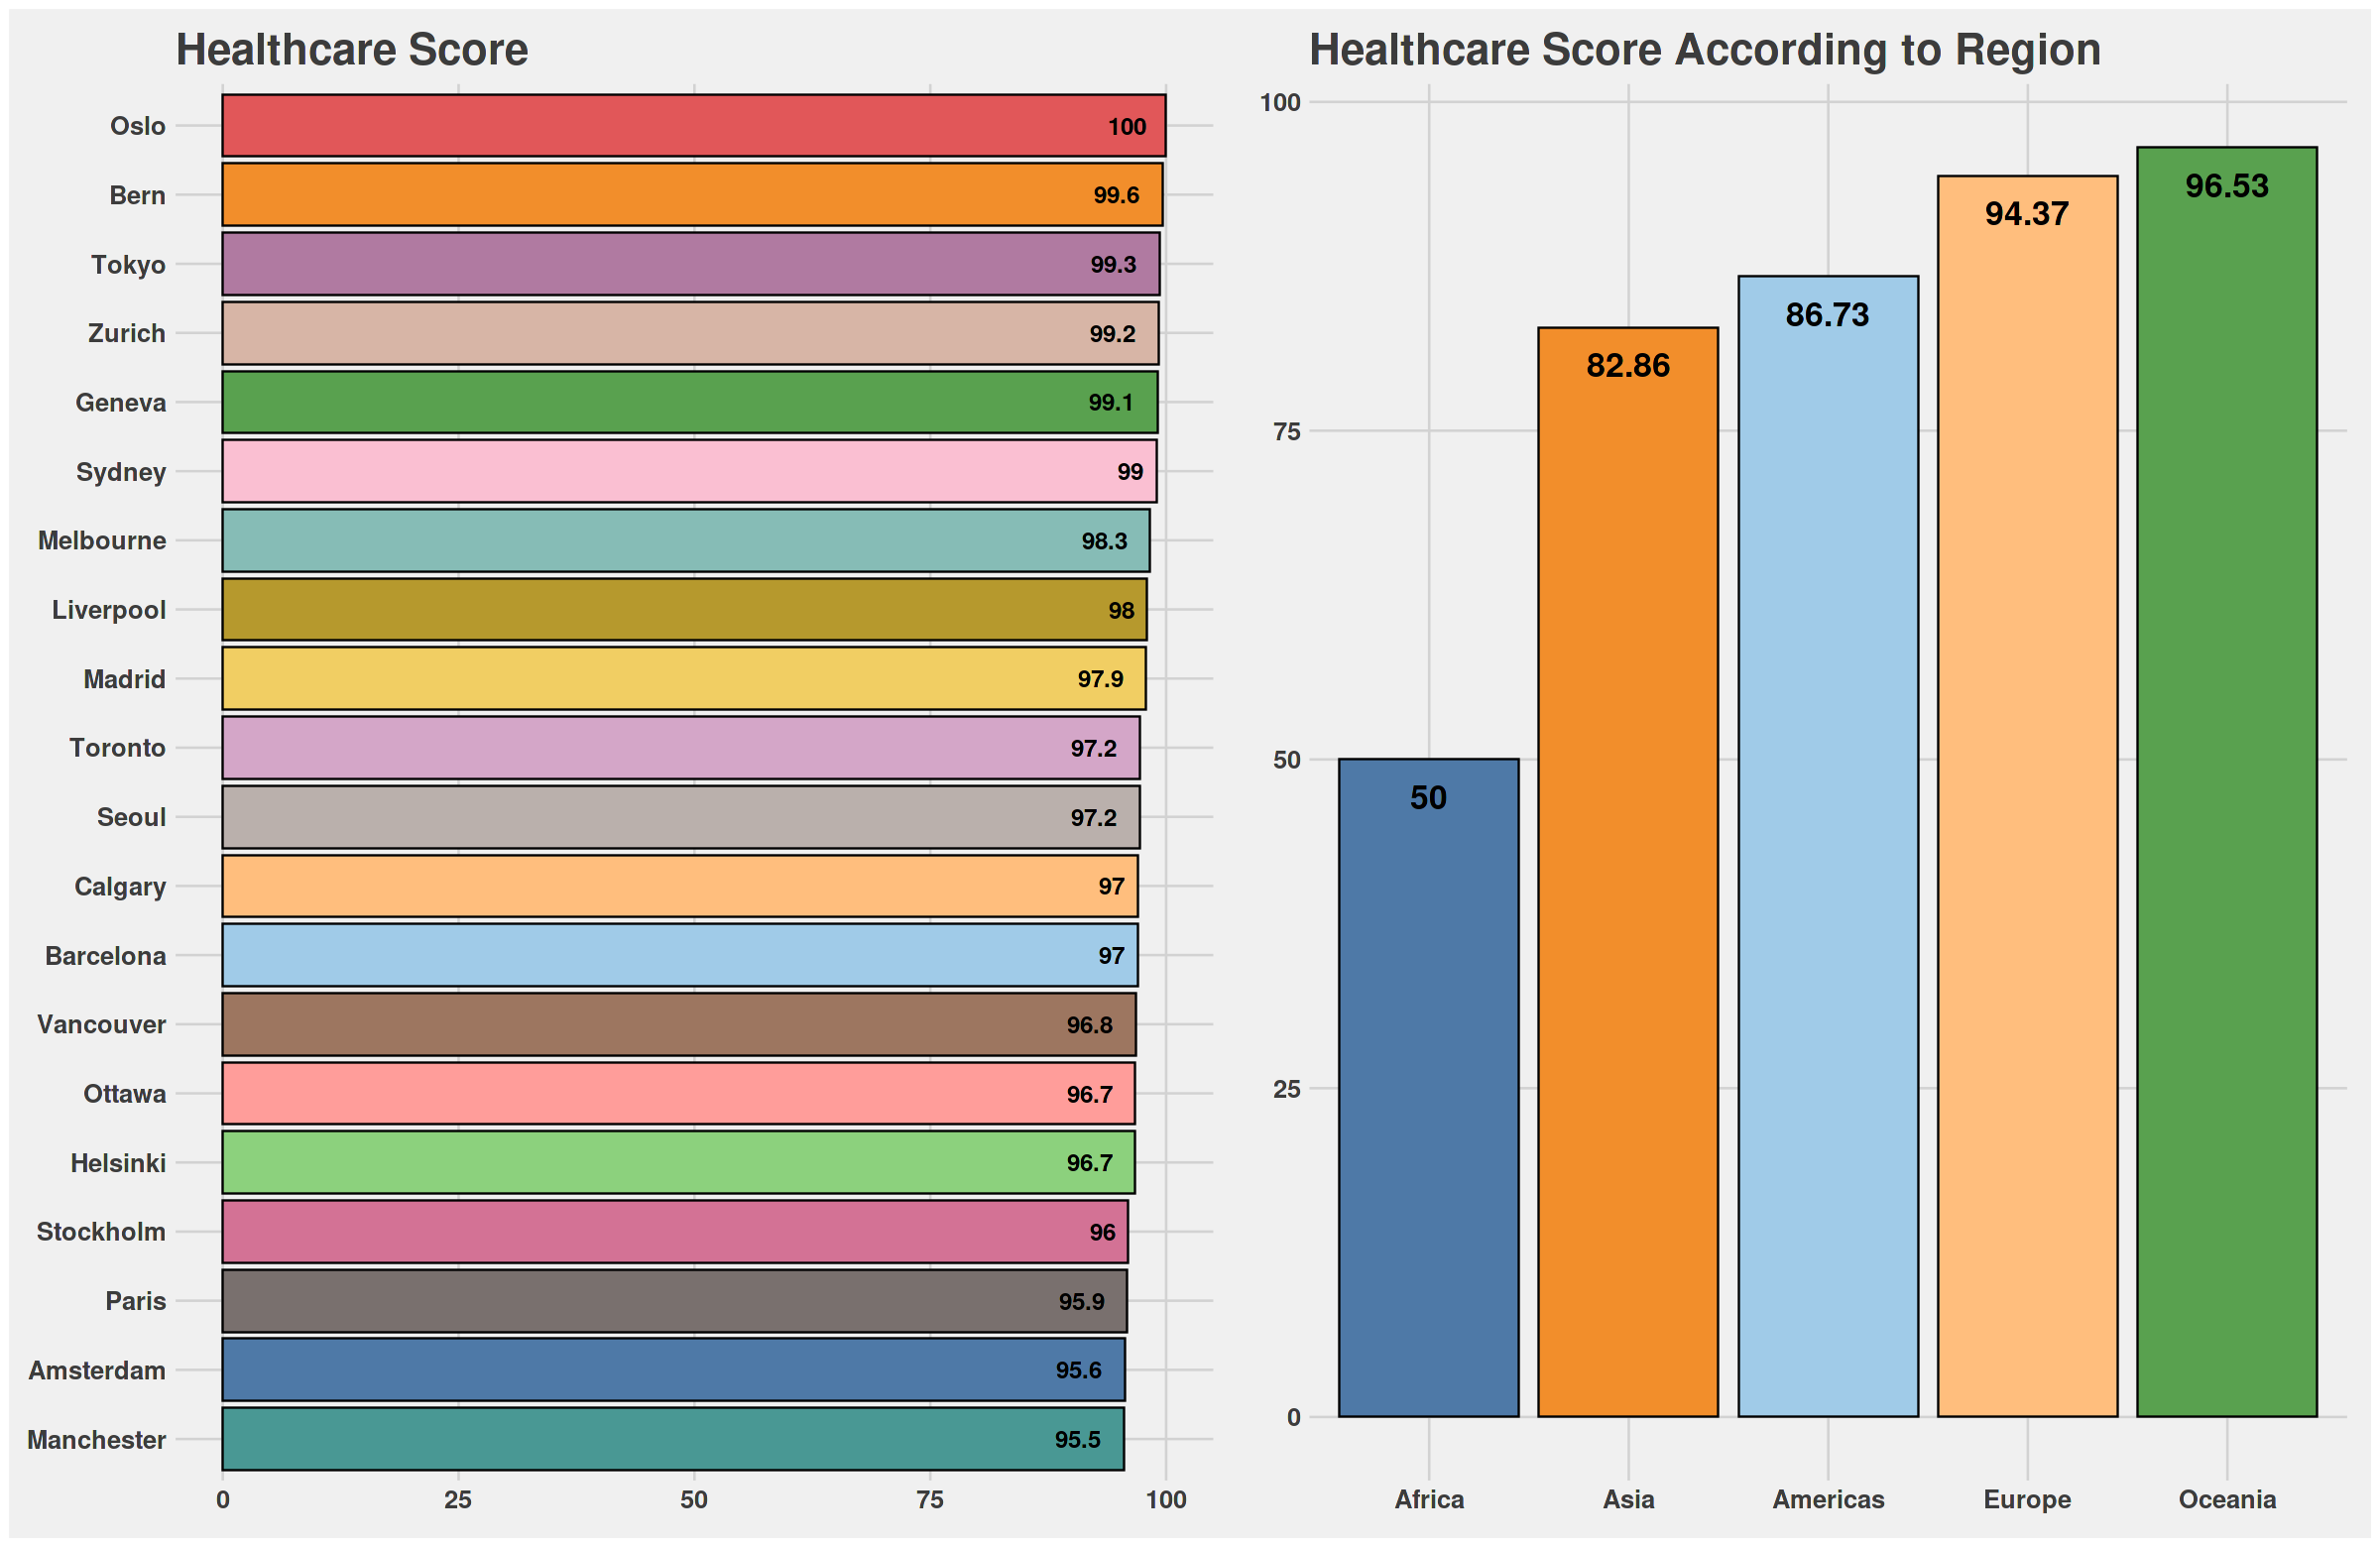

In [18]:
p11 <- df1 %>%
arrange(desc(healthcare))%>%
head(20)%>%
ggplot(aes(fct_reorder(city, healthcare),healthcare, fill = city))+
geom_col(color = 'black')+
geom_text(aes(label = healthcare), size = 5, hjust = 1.5, vjust = 0.5, fontface = 'bold')+
coord_flip()+
theme_fivethirtyeight()+
scale_fill_paletteer_d("ggthemes::Tableau_20")+
labs(title = "Healthcare Score")+
theme(axis.text.x = element_text(size = 15, face = 'bold'))+
theme(axis.text.y = element_text(size = 15, face = 'bold'))+
theme(plot.title =  element_text(size = 26, face = 'bold'))+
theme(legend.position = 'none')

p12 <- df1 %>%
group_by(region)%>%
summarise(avg = round(mean(healthcare),2))%>%
ggplot(aes(reorder(region,avg),avg, fill = region))+
geom_col(color = 'black')+
geom_text(aes(label = avg), size = 7, hjust = 0.5, vjust = 2, fontface = 'bold')+
theme_fivethirtyeight()+
scale_fill_paletteer_d("ggthemes::Tableau_20")+
labs(title = "Healthcare Score According to Region")+
theme(axis.text.x = element_text(size = 15, face = 'bold'))+
theme(axis.text.y = element_text(size = 15, face = 'bold'))+
theme(plot.title =  element_text(size = 26, face = 'bold'))+
theme(legend.position = 'none')

P = p11+p12
P

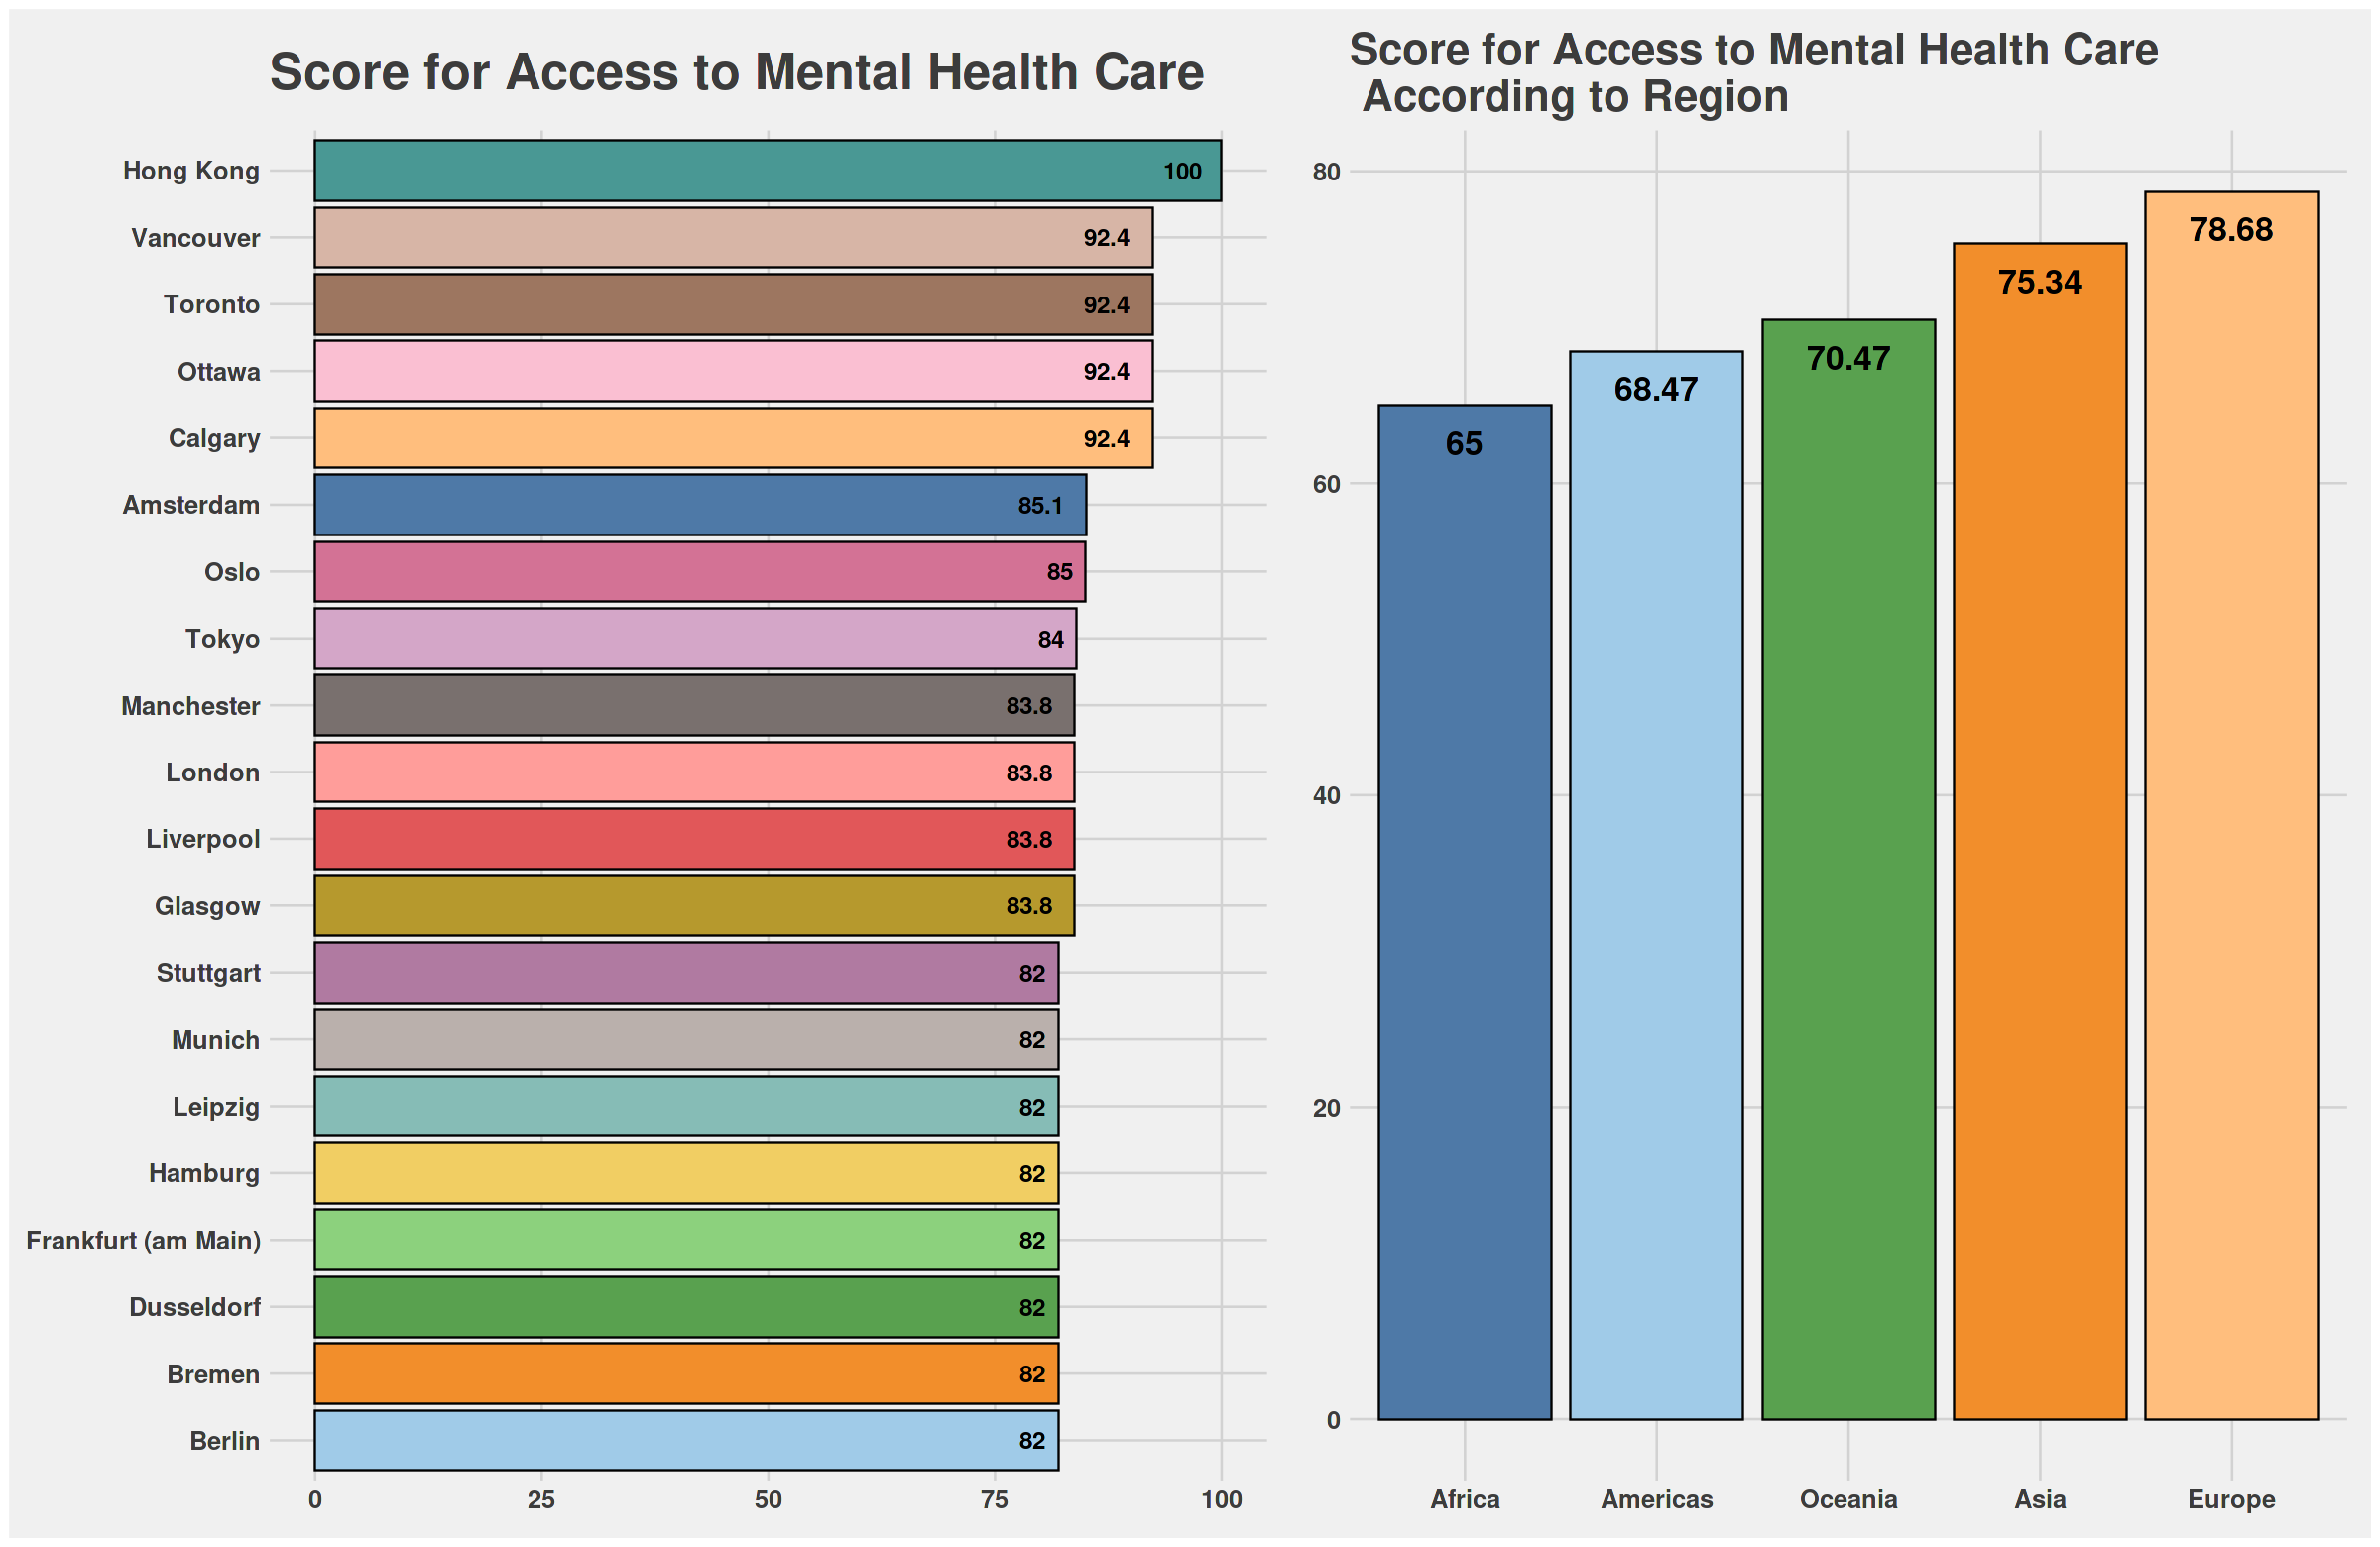

In [19]:
p13 <- df1 %>%
arrange(desc(access_to_mental_healthcare))%>%
head(20)%>%
ggplot(aes(fct_reorder(city, access_to_mental_healthcare),access_to_mental_healthcare, fill = city))+
geom_col(color = 'black')+
geom_text(aes(label = access_to_mental_healthcare), size = 5, hjust = 1.5, vjust = 0.5, fontface = 'bold')+
coord_flip()+
theme_fivethirtyeight()+
scale_fill_paletteer_d("ggthemes::Tableau_20")+
labs(title = "Score for Access to Mental Health Care")+
theme(axis.text.x = element_text(size = 15, face = 'bold'))+
theme(axis.text.y = element_text(size = 15, face = 'bold'))+
theme(plot.title =  element_text(size = 30, face = 'bold'))+
theme(legend.position = 'none')

p14 <- df1 %>%
group_by(region)%>%
summarise(avg = round(mean(access_to_mental_healthcare),2))%>%
ggplot(aes(reorder(region,avg),avg, fill = region))+
geom_col(color = 'black')+
geom_text(aes(label = avg), size = 7, hjust = 0.5, vjust = 2, fontface = 'bold')+
theme_fivethirtyeight()+
scale_fill_paletteer_d("ggthemes::Tableau_20")+
labs(title = "Score for Access to Mental Health Care \n According to Region")+
theme(axis.text.x = element_text(size = 15, face = 'bold'))+
theme(axis.text.y = element_text(size = 15, face = 'bold'))+
theme(plot.title =  element_text(size = 26, face = 'bold'))+
theme(legend.position = 'none')

P = p13+p14
P

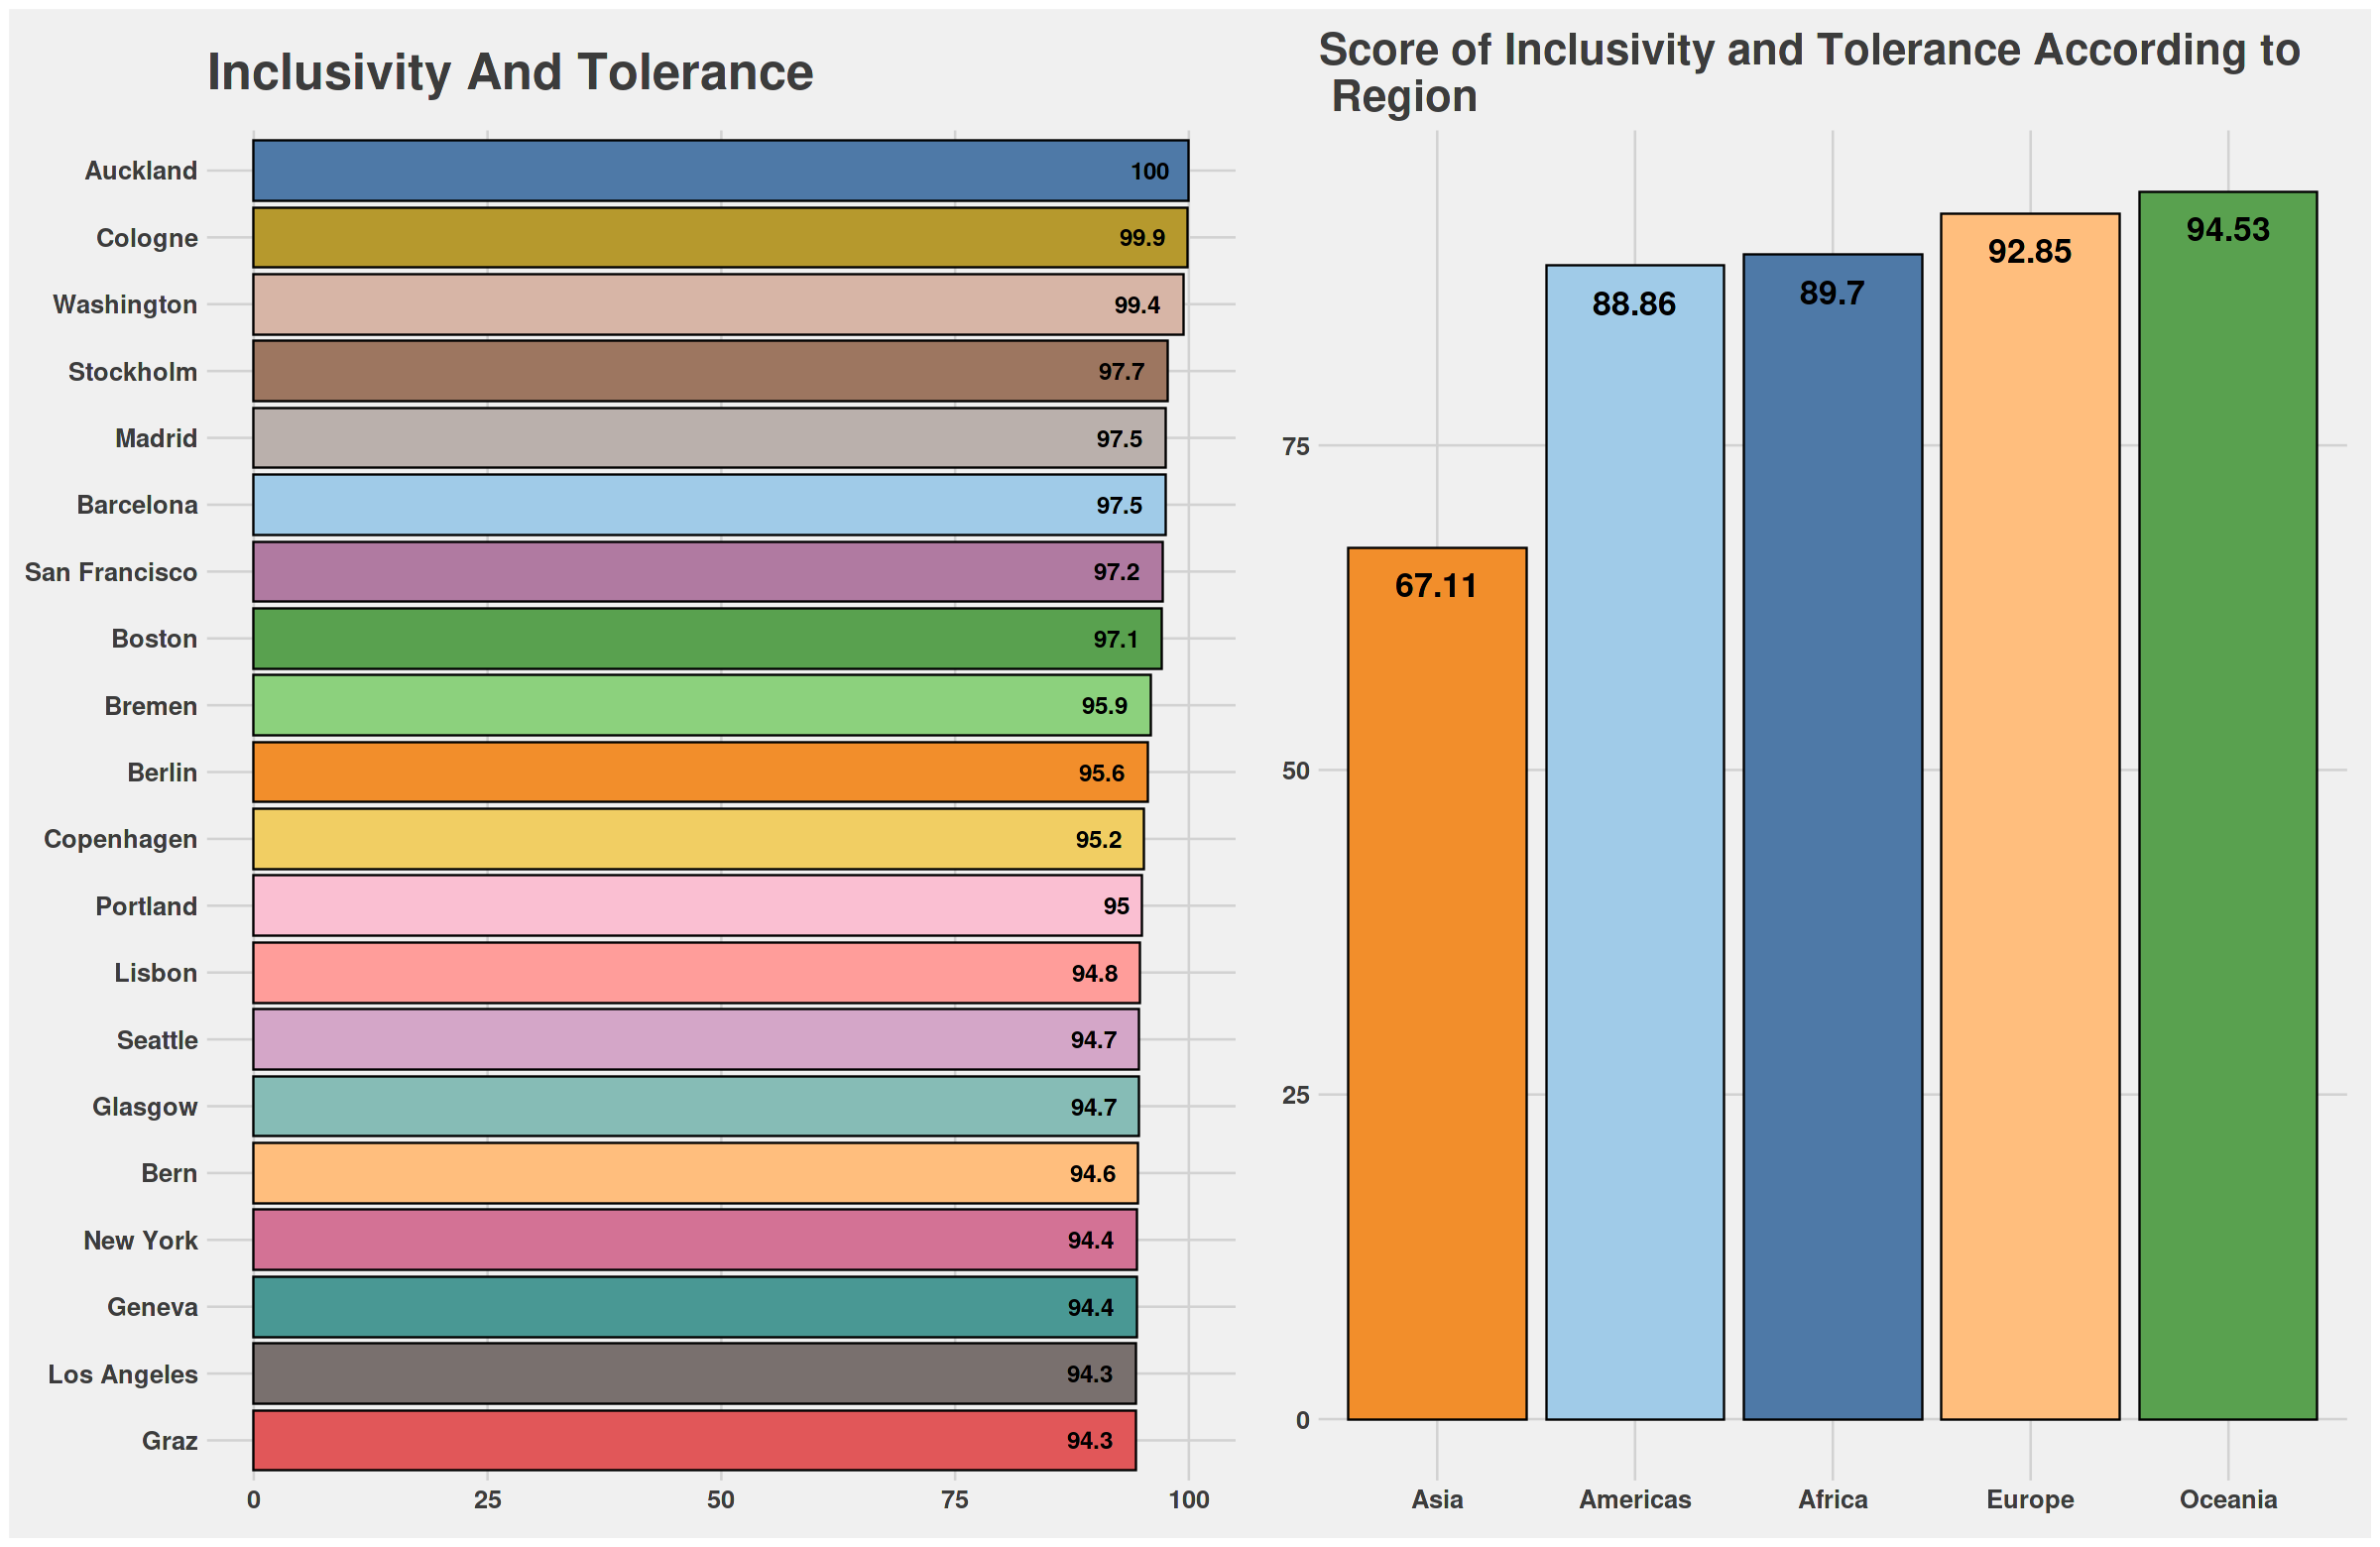

In [20]:
p15 <- df1 %>%
arrange(desc(inclusivity_tolerance))%>%
head(20)%>%
ggplot(aes(fct_reorder(city, inclusivity_tolerance),inclusivity_tolerance, fill = city))+
geom_col(color = 'black')+
geom_text(aes(label = inclusivity_tolerance), size = 5, hjust = 1.5, vjust = 0.5, fontface = 'bold')+
coord_flip()+
theme_fivethirtyeight()+
scale_fill_paletteer_d("ggthemes::Tableau_20")+
labs(title = "Inclusivity And Tolerance")+
theme(axis.text.x = element_text(size = 15, face = 'bold'))+
theme(axis.text.y = element_text(size = 15, face = 'bold'))+
theme(plot.title =  element_text(size = 30, face = 'bold'))+
theme(legend.position = 'none')

p16 <- df1 %>%
group_by(region)%>%
summarise(avg = round(mean(inclusivity_tolerance),2))%>%
ggplot(aes(reorder(region,avg),avg, fill = region))+
geom_col(color = 'black')+
geom_text(aes(label = avg), size = 7, hjust = 0.5, vjust = 2, fontface = 'bold')+
theme_fivethirtyeight()+
scale_fill_paletteer_d("ggthemes::Tableau_20")+
labs(title = "Score of Inclusivity and Tolerance According to \n Region")+
theme(axis.text.x = element_text(size = 15, face = 'bold'))+
theme(axis.text.y = element_text(size = 15, face = 'bold'))+
theme(plot.title =  element_text(size = 26, face = 'bold'))+
theme(legend.position = 'none')

P = p15+p16
P

# City Liveability

`affordability` : A score that reflects monthly living costs as a proportion of the average household income after tax. Monthly costs include rent, basic utilities costs, groceries, internet connection, leisure activities, clothes and dining out. A higher score indicates a higher level of remaining monthly income after accounting for these deductions.

`happiness_culture_and_leisure` : The combined scores of both the ‘Happiness’ and ‘Culture & Leisure’ factors.

`city_saftey` : The degree of a city’s safety in more than a dozen key areas, including environmental, social and infrastructural security. A higher score reflects a safer city.

`outdoor_spaces` : The prevalence and accessibility of a city’s urban green infrastructure as a score, including its proximity to residents and the percentage of land allocated to green space. A higher score reflects a greater urban green infrastructure, as well as better environmental conditions for outdoor life.

`air_quality` : Annual median particulate matter (PM2.5/PM10) pollution for the year 2022, represented as a score.A higher score reflects greater air quality.

`wellness_and_fitness` : The general state of a community’s physical fitness and health as represented by the population’s average life expectancy, as well as levels of inactivity, obesity, and the number of fitness studios and gyms per capita. A higher score reflects a better state of a community’s physical fitness and health.

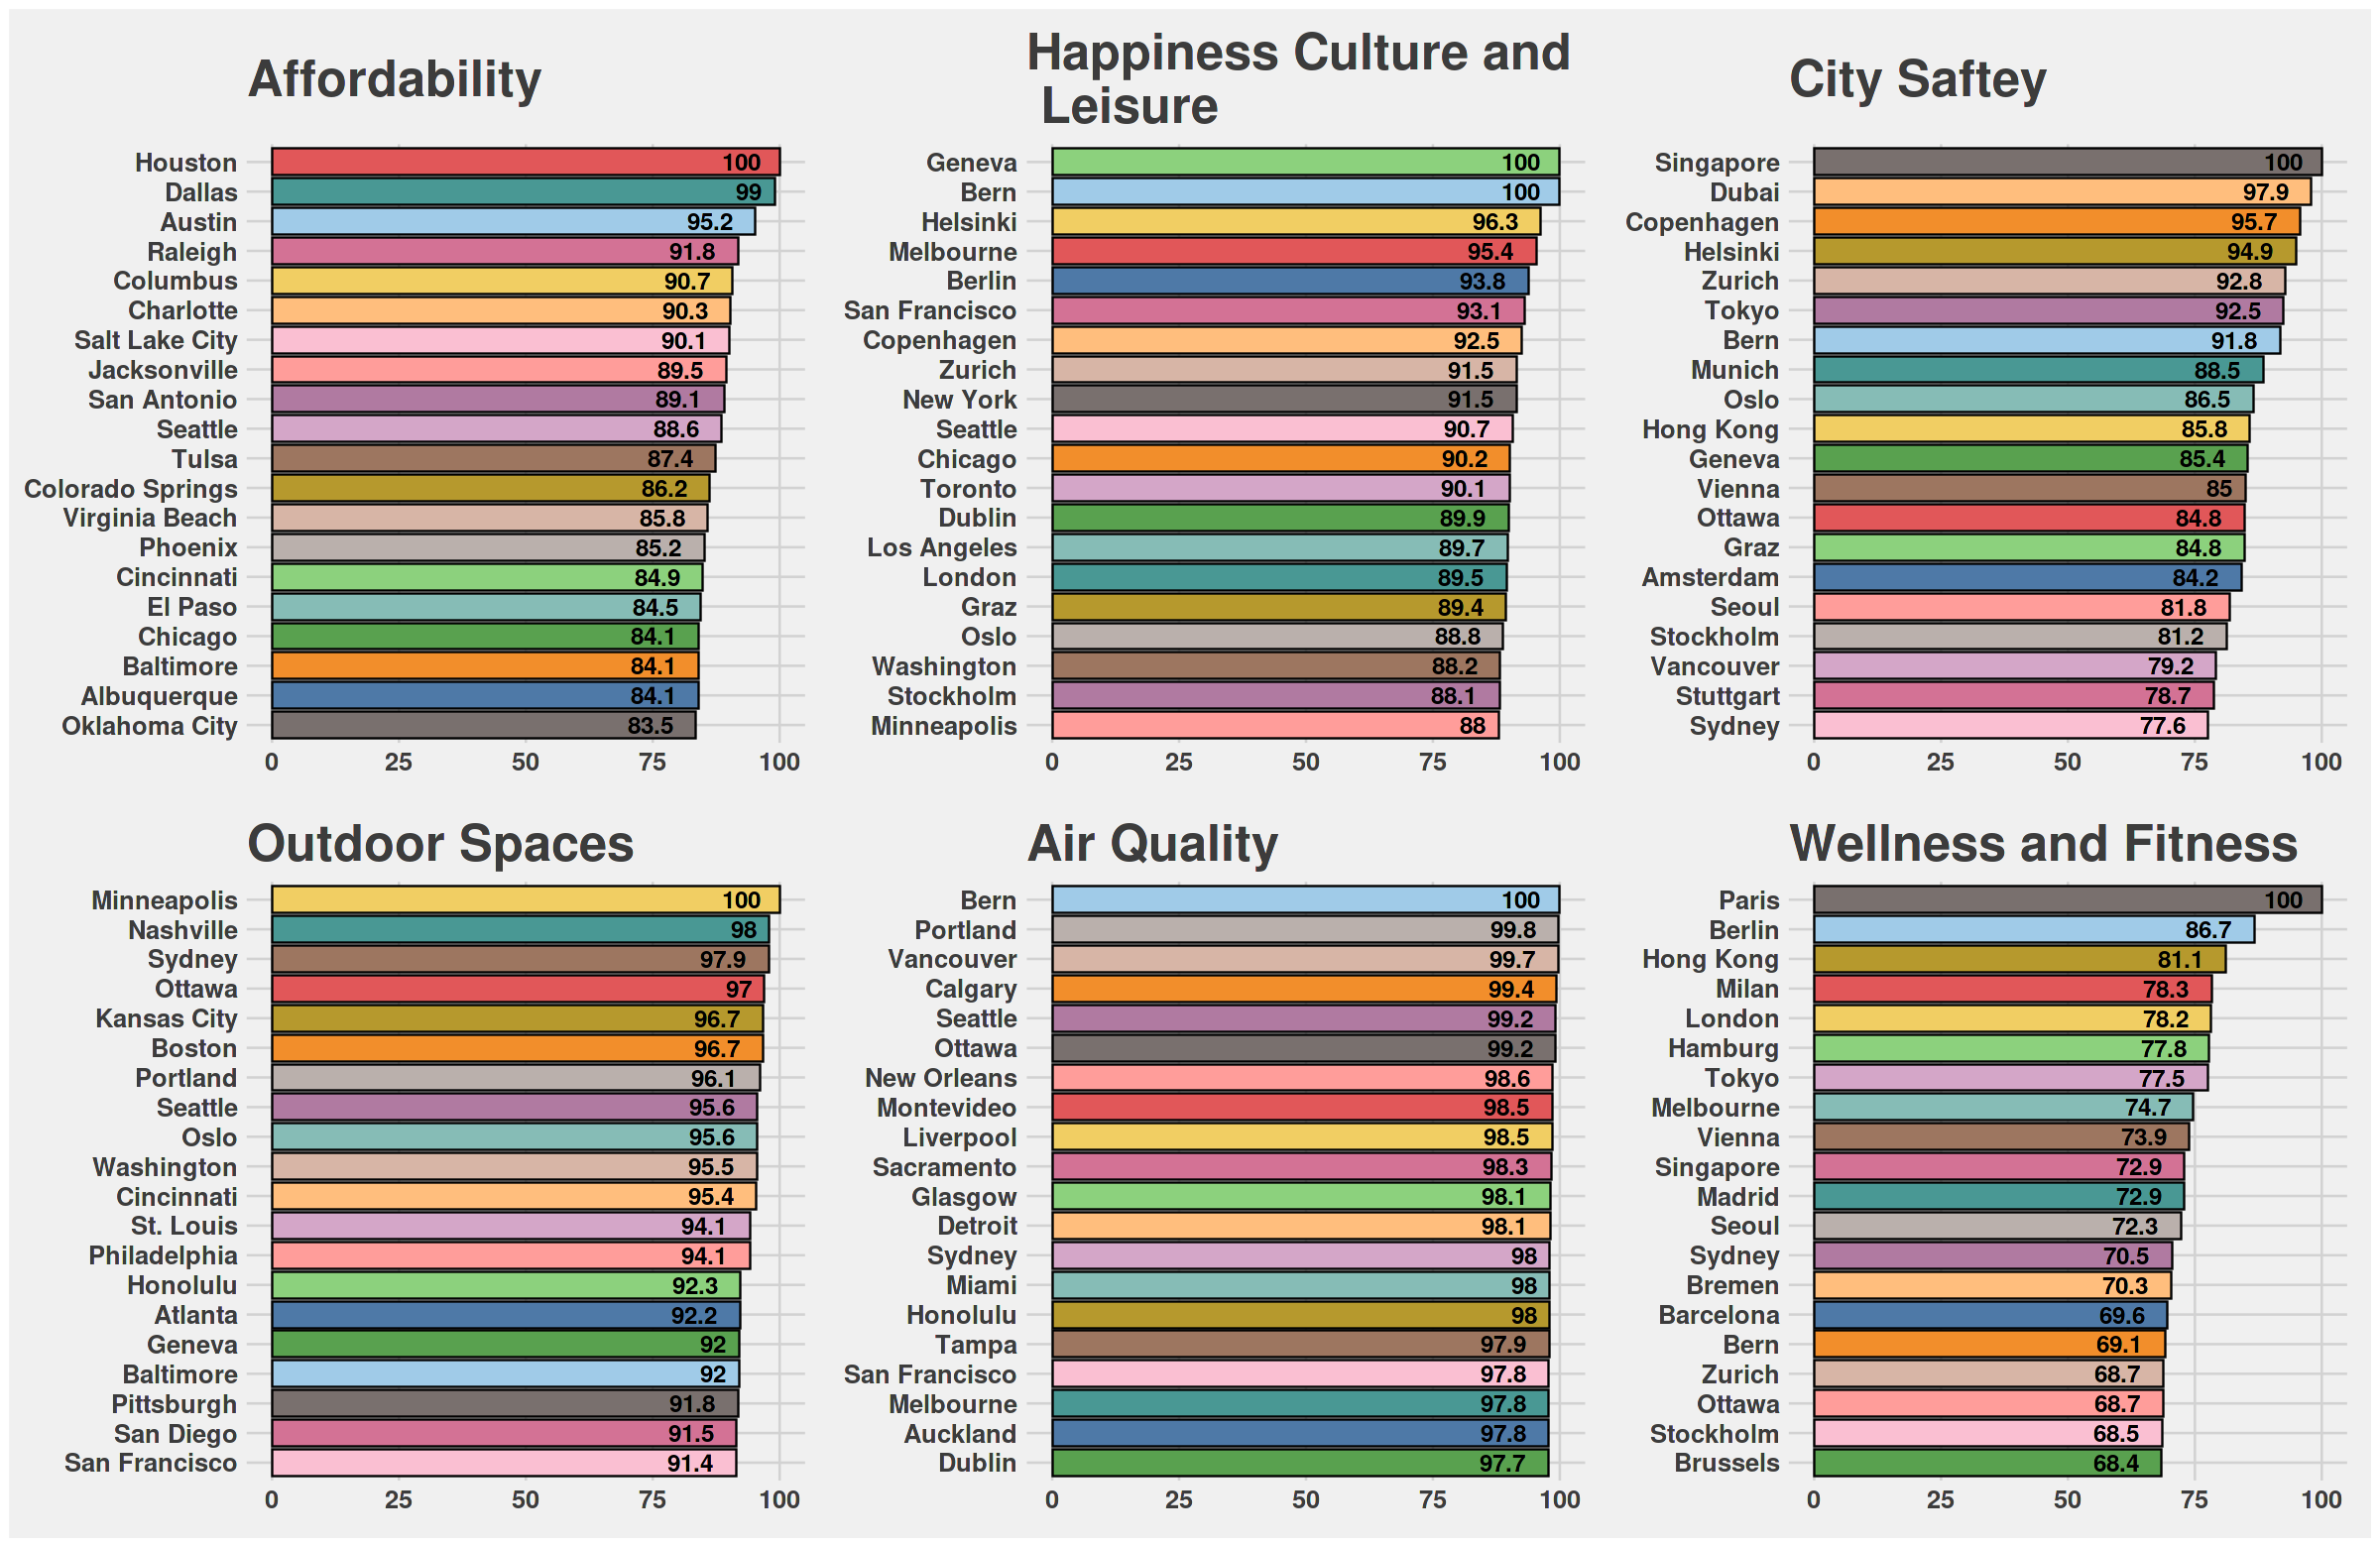

In [21]:
p17 <- df1 %>%
arrange(desc(affordability))%>%
head(20)%>%
ggplot(aes(fct_reorder(city, affordability),affordability, fill = city))+
geom_col(color = 'black')+
geom_text(aes(label = affordability), size = 5, hjust = 1.5, vjust = 0.5, fontface = 'bold')+
coord_flip()+
theme_fivethirtyeight()+
scale_fill_paletteer_d("ggthemes::Tableau_20")+
labs(title = "Affordability")+
theme(axis.text.x = element_text(size = 15, face = 'bold'))+
theme(axis.text.y = element_text(size = 15, face = 'bold'))+
theme(plot.title =  element_text(size = 30, face = 'bold'))+
theme(legend.position = 'none')

p18 <- df1 %>%
arrange(desc(happiness_culture_leisure))%>%
head(20)%>%
ggplot(aes(fct_reorder(city, happiness_culture_leisure),happiness_culture_leisure, fill = city))+
geom_col(color = 'black')+
geom_text(aes(label = happiness_culture_leisure), size = 5, hjust = 1.5, vjust = 0.5, fontface = 'bold')+
coord_flip()+
theme_fivethirtyeight()+
scale_fill_paletteer_d("ggthemes::Tableau_20")+
labs(title = "Happiness Culture and \n Leisure")+
theme(axis.text.x = element_text(size = 15, face = 'bold'))+
theme(axis.text.y = element_text(size = 15, face = 'bold'))+
theme(plot.title =  element_text(size = 30, face = 'bold'))+
theme(legend.position = 'none')

p19 <- df1 %>%
arrange(desc(city_safety))%>%
head(20)%>%
ggplot(aes(fct_reorder(city, city_safety),city_safety, fill = city))+
geom_col(color = 'black')+
geom_text(aes(label = city_safety), size = 5, hjust = 1.5, vjust = 0.5, fontface = 'bold')+
coord_flip()+
theme_fivethirtyeight()+
scale_fill_paletteer_d("ggthemes::Tableau_20")+
labs(title = "City Saftey")+
theme(axis.text.x = element_text(size = 15, face = 'bold'))+
theme(axis.text.y = element_text(size = 15, face = 'bold'))+
theme(plot.title =  element_text(size = 30, face = 'bold'))+
theme(legend.position = 'none')

p20 <- df1 %>%
arrange(desc(outdoor_spaces))%>%
head(20)%>%
ggplot(aes(fct_reorder(city, outdoor_spaces),outdoor_spaces, fill = city))+
geom_col(color = 'black')+
geom_text(aes(label = outdoor_spaces), size = 5, hjust = 1.5, vjust = 0.5, fontface = 'bold')+
coord_flip()+
theme_fivethirtyeight()+
scale_fill_paletteer_d("ggthemes::Tableau_20")+
labs(title = "Outdoor Spaces")+
theme(axis.text.x = element_text(size = 15, face = 'bold'))+
theme(axis.text.y = element_text(size = 15, face = 'bold'))+
theme(plot.title =  element_text(size = 30, face = 'bold'))+
theme(legend.position = 'none')


p21 <- df1 %>%
arrange(desc(air_quality))%>%
head(20)%>%
ggplot(aes(fct_reorder(city, air_quality),air_quality, fill = city))+
geom_col(color = 'black')+
geom_text(aes(label = air_quality), size = 5, hjust = 1.5, vjust = 0.5, fontface = 'bold')+
coord_flip()+
theme_fivethirtyeight()+
scale_fill_paletteer_d("ggthemes::Tableau_20")+
labs(title = "Air Quality")+
theme(axis.text.x = element_text(size = 15, face = 'bold'))+
theme(axis.text.y = element_text(size = 15, face = 'bold'))+
theme(plot.title =  element_text(size = 30, face = 'bold'))+
theme(legend.position = 'none')


p22 <- df1 %>%
arrange(desc(wellness_and_fitness))%>%
head(20)%>%
ggplot(aes(fct_reorder(city, wellness_and_fitness),wellness_and_fitness, fill = city))+
geom_col(color = 'black')+
geom_text(aes(label = wellness_and_fitness), size = 5, hjust = 1.5, vjust = 0.5, fontface = 'bold')+
coord_flip()+
theme_fivethirtyeight()+
scale_fill_paletteer_d("ggthemes::Tableau_20")+
labs(title = "Wellness and Fitness")+
theme(axis.text.x = element_text(size = 15, face = 'bold'))+
theme(axis.text.y = element_text(size = 15, face = 'bold'))+
theme(plot.title =  element_text(size = 30, face = 'bold'))+
theme(legend.position = 'none')



P = p17+p18+p19+p20+p21+p22
P